In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import copy
import seaborn as sns


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Part 1: London’s underground resilience


### I. Topological network

#### I.1. Centrality measures

In [3]:
# 创建图
# G = nx.from_pandas_edgelist(df, 'station_origin', 'station_destination', ['distance'])
G = nx.read_graphml(
    '/Users/zonghe/Documents/Modules/Term2/CASA0002 Urban Simulation/week10/week10practice/outputs/london.graph')

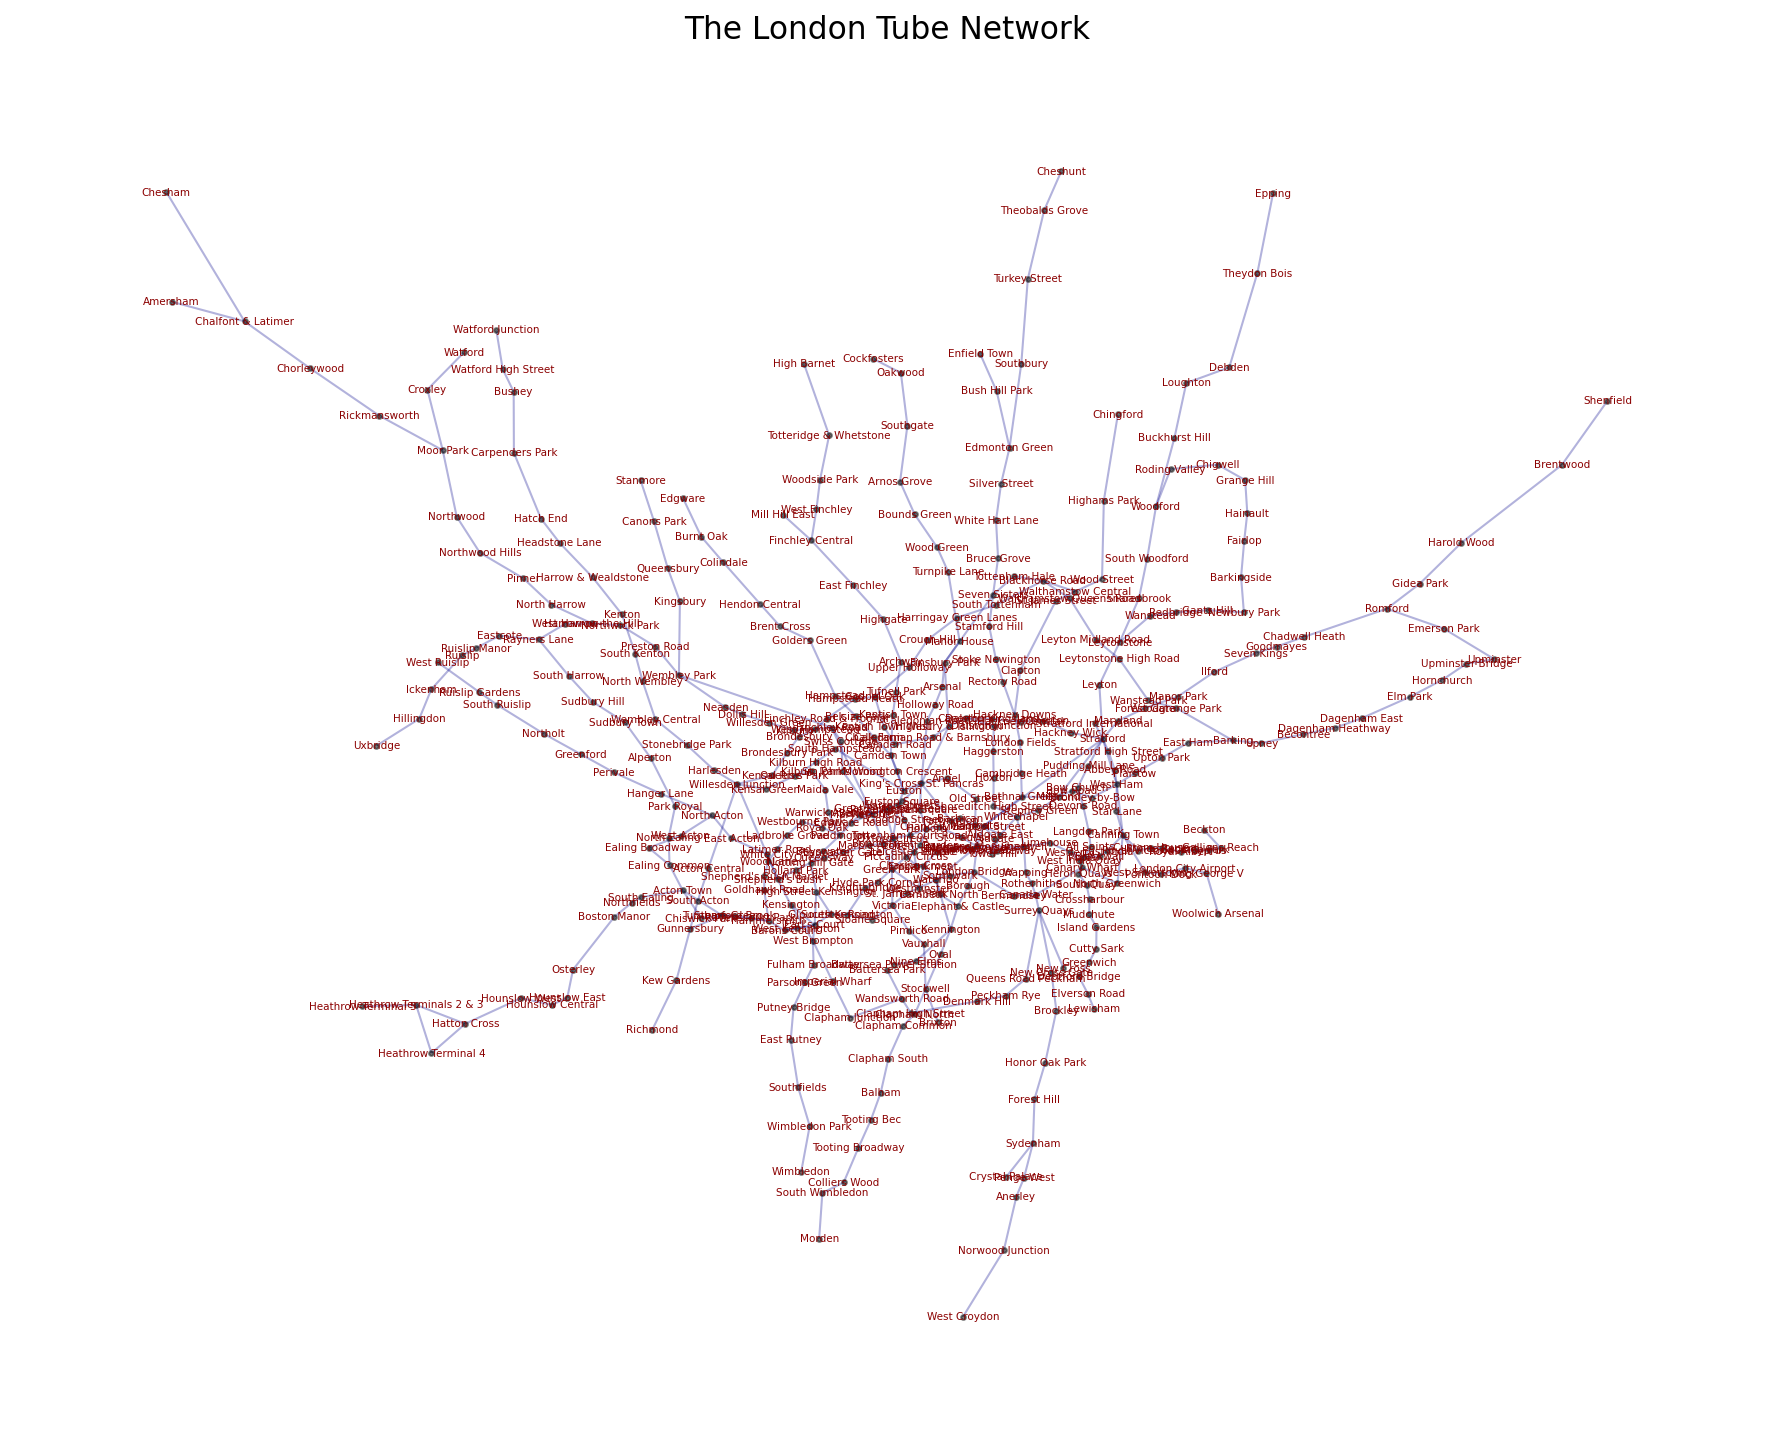

In [4]:
# Extract 'x' and 'y' values from 'coords' attribute
for node in G.nodes():
    coords = G.nodes[node]['coords'].split(',')
    G.nodes[node]['x'] = float(coords[0].strip("()"))
    G.nodes[node]['y'] = float(coords[1].strip("()"))

pos = {node: (G.nodes[node]['x'], G.nodes[node]['y']) for node in G.nodes()}
# pos = nx.spring_layout(G)
fig = plt.figure(figsize=(15, 12), dpi=150)
nx.draw_networkx_edges(G, pos, edge_color='darkblue', alpha=0.3)
nx.draw_networkx_nodes(G, pos, node_size=5, node_color='black', alpha=0.5, label='Stations')
nx.draw_networkx_labels(G, pos, font_size=5, font_color='darkred')
plt.axis("off")
plt.title('The London Tube Network', fontsize=15)

plt.show()

In [5]:
def df_to_markdown(df, index=True, header=True):
    markdown_str = ""
    if header:
        markdown_str += "| Rank |" if index else "| "
        markdown_str += "| ".join(df.columns) + " |\n"
        markdown_str += "| " + " | ".join(["---"] * (len(df.columns) + (1 if index else 0))) + " |\n"
    for i, row in df.iterrows():
        if index:
            markdown_str += "| " + str(i)
        for col in df.columns:
            markdown_str += " | " + row[col]
        markdown_str += " |\n"
    return markdown_str


In [6]:
# calculate 3 centrality measures for each node
deg_cen = nx.degree_centrality(G.copy())
bet_cen = nx.betweenness_centrality(G.copy())
# eig_cen = nx.eigenvector_centrality(G)
clo_cen = nx.closeness_centrality(G.copy())

# convert the results to a DataFrame and sort
deg_cen_df = pd.DataFrame(list(deg_cen.items()), columns=['station', 'degree_centrality'])
deg_cen_df = deg_cen_df.sort_values('degree_centrality', ascending=False).reset_index(drop=True)

bet_cen_df = pd.DataFrame(list(bet_cen.items()), columns=['station', 'betweenness_centrality'])
bet_cen_df = bet_cen_df.sort_values('betweenness_centrality', ascending=False).reset_index(drop=True)

clo_cen_df = pd.DataFrame(list(clo_cen.items()), columns=['station', 'closeness_centrality'])
clo_cen_df = clo_cen_df.sort_values('closeness_centrality', ascending=False).reset_index(drop=True)

# # Print the top 10 nodes for each centrality measure
# print("Top 10 ranked nodes for Degree Centrality:\n", deg_cen_df.head(10))
# print("\nTop 10 ranked nodes for Betweenness Centrality:\n", bet_cen_df.head(10))
# print("\nTop 10 ranked nodes for Closeness Centrality:\n", clo_cen_df.head(10))


# Create new columns with the desired format 'station (value)'
deg_cen_df['degree_centrality_formatted'] = deg_cen_df['station'] + ' (' + deg_cen_df['degree_centrality'].round(
    4).astype(str) + ')'
bet_cen_df['betweenness_centrality_formatted'] = bet_cen_df['station'] + ' (' + bet_cen_df[
    'betweenness_centrality'].round(4).astype(str) + ')'
clo_cen_df['closeness_centrality_formatted'] = clo_cen_df['station'] + ' (' + clo_cen_df['closeness_centrality'].round(
    4).astype(str) + ')'

# Merge dataframes
merged_df = pd.concat([deg_cen_df['degree_centrality_formatted'].head(10),
                       bet_cen_df['betweenness_centrality_formatted'].head(10),
                       clo_cen_df['closeness_centrality_formatted'].head(10)], axis=1)

# Rename columns
merged_df.columns = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality']

# Set the index to start from 1
merged_df.index = merged_df.index + 1

# # Generate markdown output
# print("Top 10 ranked nodes for 3 Centrality Measurements\n")
# print(df_to_markdown(merged_df, index=True, header=True))

# Display the merged dataframe
merged_df







,Degree Centrality,Betweenness Centrality,Closeness Centrality
1,Stratford (0.0225),Stratford (0.2978),Green Park (0.1148)
2,Bank and Monument (0.02),Bank and Monument (0.2905),Bank and Monument (0.1136)
3,Baker Street (0.0175),Liverpool Street (0.2708),King's Cross St. Pancras (0.1134)
4,King's Cross St. Pancras (0.0175),King's Cross St. Pancras (0.2553),Westminster (0.1125)
5,Green Park (0.015),Waterloo (0.2439),Waterloo (0.1123)
6,Canning Town (0.015),Green Park (0.2158),Oxford Circus (0.1112)
7,Earl's Court (0.015),Euston (0.2083),Bond Street (0.111)
8,West Ham (0.015),Westminster (0.2033),Farringdon (0.1107)
9,Waterloo (0.015),Baker Street (0.1916),Angel (0.1107)
10,Oxford Circus (0.015),Finchley Road (0.1651),Moorgate (0.1103)


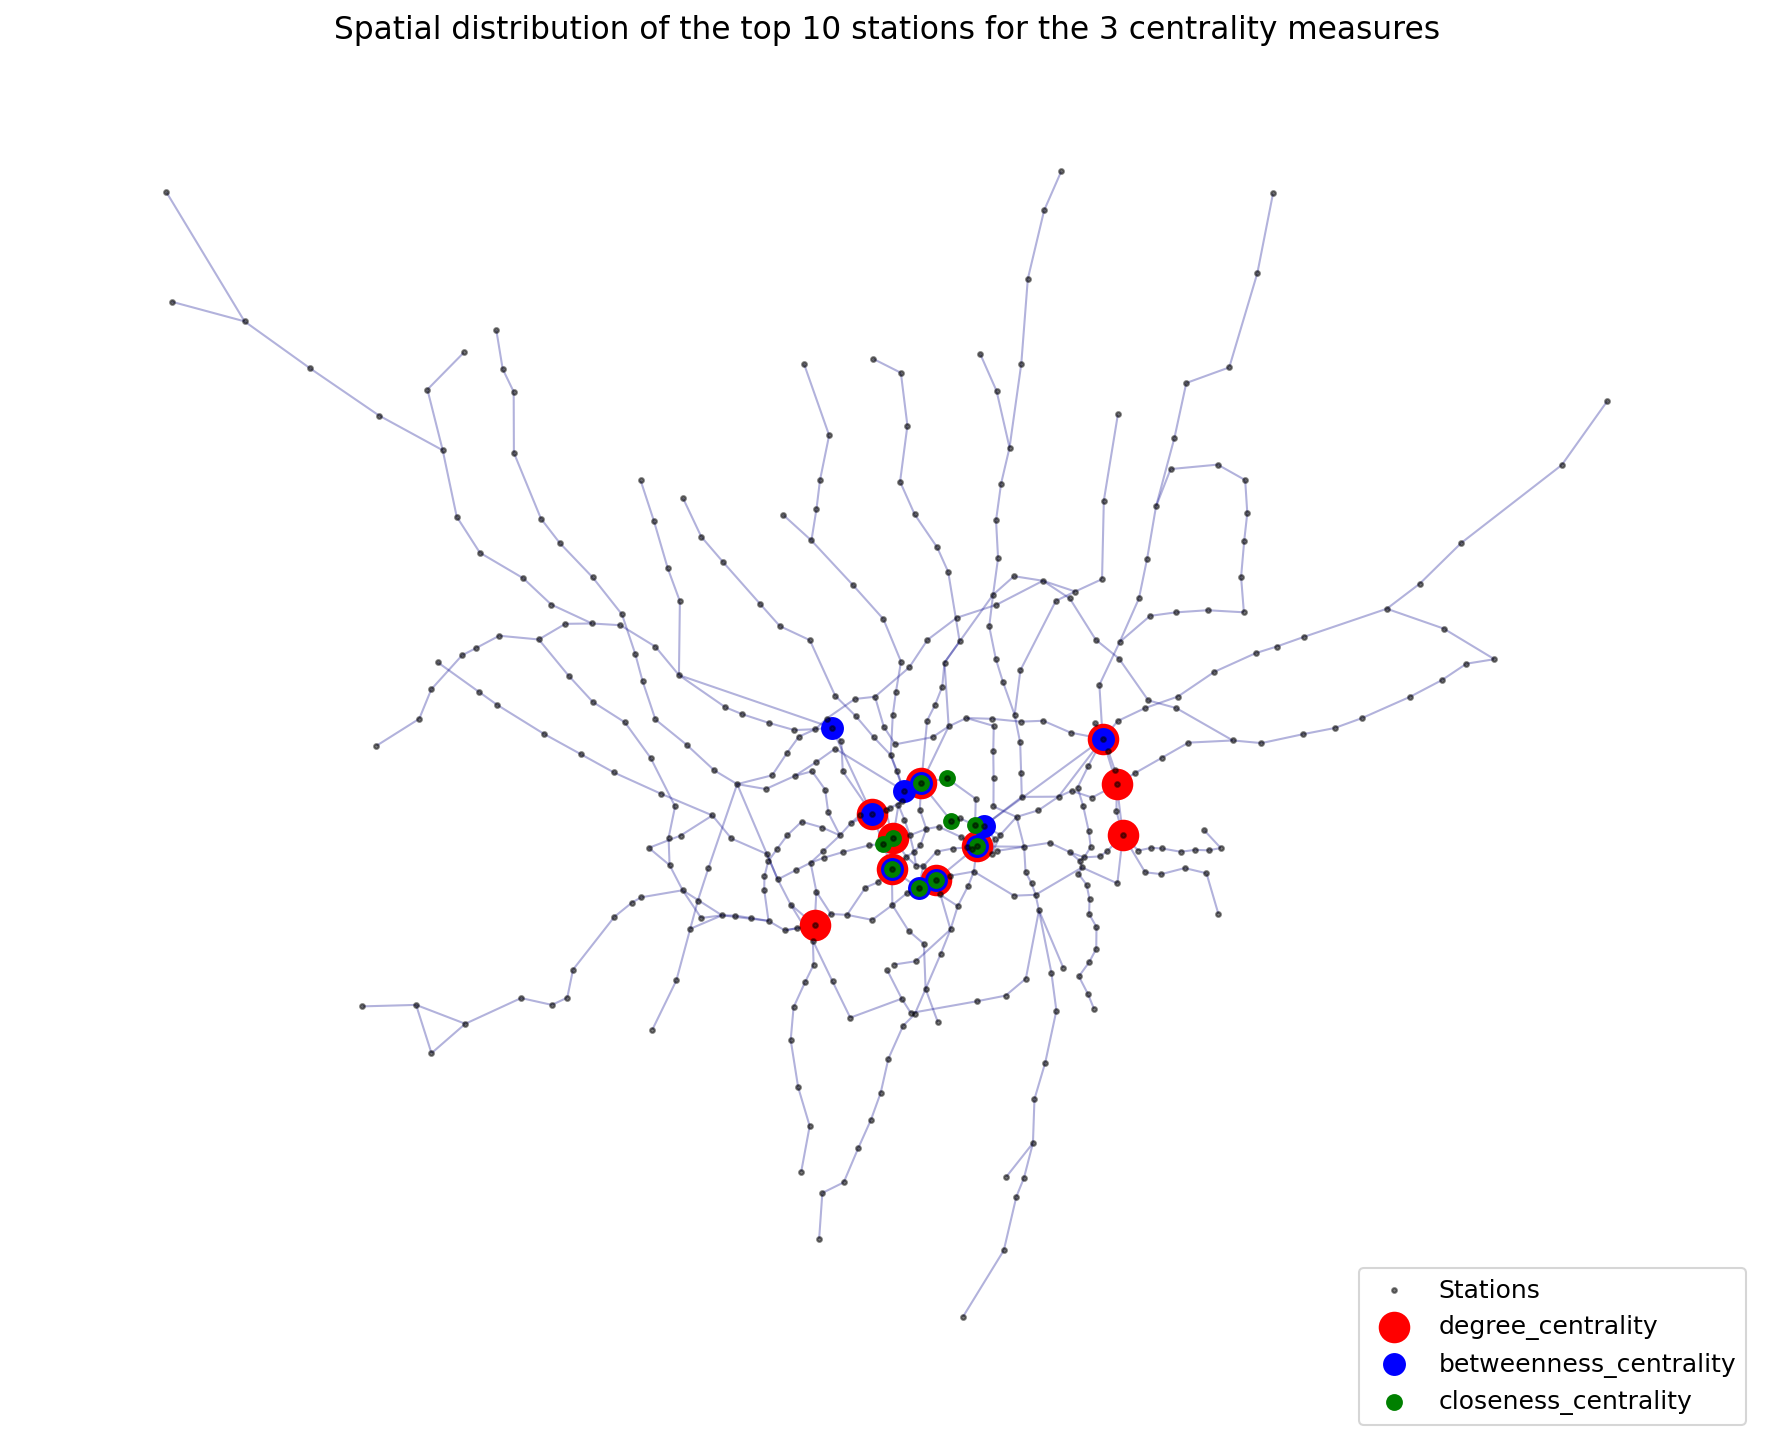

In [7]:
# Define color and size for each centrality measure
colors = ['red', 'blue', 'green']
sizes = [200, 100, 50]

# Create a scatter plot of the stations
fig, ax = plt.subplots(figsize=(15, 12), dpi=150)

# # Plot the London tube map as a background
nx.draw_networkx_edges(G, pos, edge_color='darkblue', alpha=0.3)
nx.draw_networkx_nodes(G, pos, node_size=5, node_color='black', alpha=0.5, label='Stations')

# Loop through the top 10 stations for each centrality measure
for i, df in enumerate([deg_cen_df.head(10), bet_cen_df.head(10), clo_cen_df.head(10)]):
    # Get the x and y coordinates of each station
    x = [G.nodes[node]['x'] for node in df['station']]
    y = [G.nodes[node]['y'] for node in df['station']]

    # Plot the stations as a scatter plot with different color and size for each centrality measure
    ax.scatter(x, y, color=colors[i], s=sizes[i], label=df.columns[1])

# Add a title and legend to the plot
plt.title('Spatial distribution of the top 10 stations for the 3 centrality measures', fontsize=15)
plt.legend(loc='lower right', fontsize=12)

# Hide the axis and show the plot
plt.axis('off')
plt.show()


In [8]:
# # print the graph information
# print(nx.info(G))
#
# # check the number of nodes and edges
# print("Number of nodes: ", G.number_of_nodes())
# print("Number of edges: ", G.number_of_edges())
#
# # check the node and edge attributes
# # print("Node attributes: ", G.nodes(data=True))
# print("Edge attributes: ", G.edges(data=True))

#### I.2. Impact measures

In [9]:
# Create a function to compute the number of connected components in the network after node removal
def count_connected_components(G):
    G_copy = copy.deepcopy(G)
    return len(list(nx.connected_components(G_copy)))


# Create a function to compute the size of the largest connected component in the network after node removal
def size_largest_component(G):
    G_copy = copy.deepcopy(G)
    components = list(nx.connected_components(G_copy))
    largest_component = max(components, key=len)
    return len(largest_component)

#
# def global_efficiency(G):
#     G_copy = copy.deepcopy(G)
#     return nx.global_efficiency(G_copy)


In [10]:
# import networkx as nx
# import matplotlib.pyplot as plt
#
# # Create the example network
# G = nx.Graph()
# nodes = [1, 2, 3, 4, 5, 6]
# edges = [(1, 2), (2, 3), (3, 1), (4, 5)]
# G.add_nodes_from(nodes)
# G.add_edges_from(edges)
#
# # Compute the connected components and their sizes
# connected_components = list(nx.connected_components(G))
# number_of_connected_components = len(connected_components)
# largest_component = max(connected_components, key=len)
# size_of_largest_component = len(largest_component)
#
# # Visualize the network
# pos = nx.spring_layout(G)
# fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
# nx.draw(G, pos, with_labels=True, node_color="orange", font_weight="bold", node_size=500, ax=ax)
# ax.set_title("Example Network for NCC and LCS")
# plt.annotate('Number of connected components(NCC): ' + str(number_of_connected_components), xy=(0.5, 0.95), xycoords='axes fraction', fontsize=12)
# plt.annotate('Size of largest connected component(LCS): ' + str(size_of_largest_component), xy=(0.5, 0.90), xycoords='axes fraction', fontsize=12)
# plt.axis('off')
# plt.show()


#### I.3. Node removal

In [11]:
def nonseq_removal(G, centrality_measure, num_nodes=10):
    G_removal = copy.deepcopy(G)
    # Compute centrality measure for all nodes in the network
    node_centrality = centrality_measure(G_removal)

    # Create a DataFrame with nodes and their centrality scores
    nodes_df = pd.DataFrame(list(node_centrality.items()), columns=['node', 'centrality'])

    # Sort nodes by their centrality score
    nodes_sorted = nodes_df.sort_values(by='centrality', ascending=False)

    # Initialize lists to store the impact measures for each node removal
    num_components = []
    largest_component_size = []
    num_components.append(count_connected_components(G_removal))
    largest_component_size.append(size_largest_component(G_removal))

    # Remove nodes in order of decreasing centrality score and compute impact measures
    for i in range(min(num_nodes, len(nodes_sorted))):
        node = nodes_sorted.iloc[i]['node']
        G_copy = copy.deepcopy(G_removal)
        G_copy.remove_node(node)
        num_components.append(count_connected_components(G_removal))
        largest_component_size.append(size_largest_component(G_removal))

    return num_components, largest_component_size, num_nodes


def seq_removal(G, centrality_measure, num_nodes=10):
    G_removal = copy.deepcopy(G)
    # Initialize lists to store the impact measures for each node removal
    num_components = []
    largest_component_size = []
    num_components.append(count_connected_components(G_removal))
    largest_component_size.append(size_largest_component(G_removal))
    # Continue removing nodes until 10 nodes have been removed
    for i in range(min(num_nodes, len(G_removal.nodes))):
        # Compute centrality measure for all nodes in the network
        node_centrality = centrality_measure(G_removal)

        # Create a DataFrame with nodes and their centrality scores
        nodes_df = pd.DataFrame(list(node_centrality.items()), columns=['node', 'centrality'])

        # Sort nodes by their centrality score
        nodes_sorted = nodes_df.sort_values(by='centrality', ascending=False)

        # Remove the highest ranked node and compute impact measures
        node = nodes_sorted.iloc[0]['node']
        G_removal.remove_node(node)
        num_components.append(count_connected_components(G_removal))
        largest_component_size.append(size_largest_component(G_removal))

    return num_components, largest_component_size, num_nodes


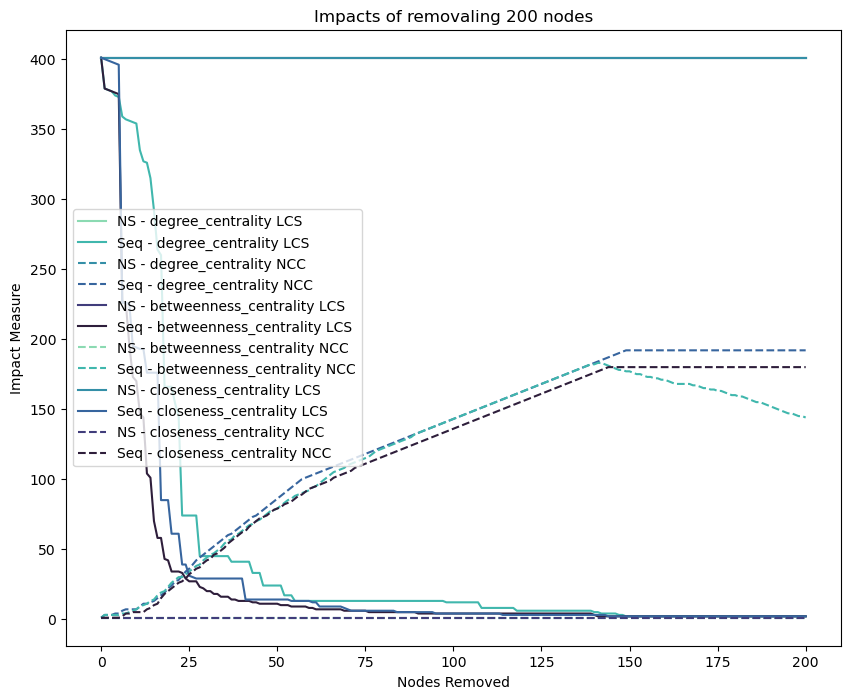

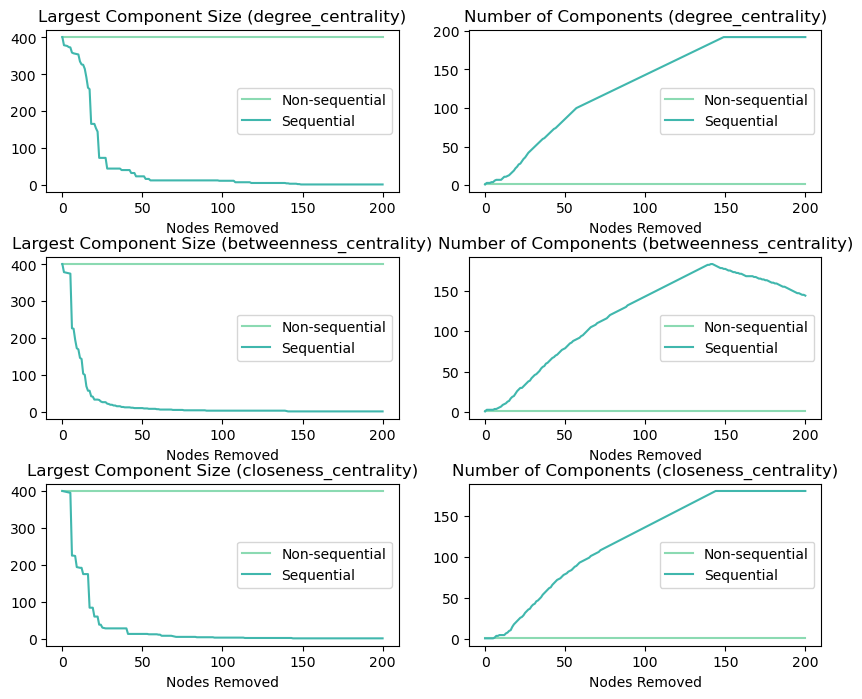

In [12]:
#Define the centrality measures to use
centrality_measures = [nx.degree_centrality, nx.betweenness_centrality, nx.closeness_centrality]

# Initialize lists to store results for each centrality measure
ns_num_components = []
ns_largest_component_size = []
seq_num_components = []
seq_largest_component_size = []

# Perform node removal for each centrality measure using both non-sequential and sequential strategies
for centrality_measure in centrality_measures:
    # Perform non-sequential removal
    ns_components, ns_size, ns_nodes = nonseq_removal(G, centrality_measure, 200)
    ns_num_components.append(ns_components)
    ns_largest_component_size.append(ns_size)

    # Perform sequential removal
    seq_components, seq_size, seq_nodes = seq_removal(G, centrality_measure, 200)
    seq_num_components.append(seq_components)
    seq_largest_component_size.append(seq_size)

#Loading the data
G = copy.deepcopy(G)

# Set a color palette
sns.set_palette("mako_r")

# Plot the impact measures for each strategy and centrality measure in one plot
plt.figure(figsize=(10, 8))
for i in range(len(centrality_measures)):
    plt.plot(ns_largest_component_size[i], label=f'NS - {centrality_measures[i].__name__} LCS')
    plt.plot(seq_largest_component_size[i], label=f'Seq - {centrality_measures[i].__name__} LCS')
    plt.plot(ns_num_components[i], linestyle='--', label=f'NS - {centrality_measures[i].__name__} NCC')
    plt.plot(seq_num_components[i], linestyle='--',
             label=f'Seq - {centrality_measures[i].__name__} NCC')
plt.legend(loc='upper right')
plt.title(f'Impacts of removaling {ns_nodes} nodes')
plt.xlabel('Nodes Removed')
plt.ylabel('Impact Measure')
plt.grid(False)
plt.gcf().set_facecolor('none')
plt.legend()

plt.show()

# Plot the impact measures for each strategy and centrality measure for better understanding and analysis
plt.figure(figsize=(10, 8))
for i in range(len(centrality_measures)):
    plt.subplot(3, 2, 2 * i + 1)
    plt.plot(ns_largest_component_size[i], label='Non-sequential')
    plt.plot(seq_largest_component_size[i], label='Sequential')
    plt.title(f'Largest Component Size ({centrality_measures[i].__name__})')
    plt.xlabel('Nodes Removed')
    # plt.ylabel('Size of Largest Component')
    plt.legend()
    plt.grid(False)
    plt.gcf().set_facecolor('none')

    plt.subplot(3, 2, 2 * i + 2)
    plt.plot(ns_num_components[i], label='Non-sequential')
    plt.plot(seq_num_components[i], label='Sequential')
    plt.title(f'Number of Components ({centrality_measures[i].__name__})')
    plt.xlabel('Nodes Removed')
    # plt.ylabel('Number of Component')
    plt.legend()
    plt.grid(False)
    plt.gcf().set_facecolor('none')

plt.subplots_adjust(hspace=0.4)
plt.show()



### II. Flows: weighted network

#### II.1
> Consider the centrality measure derived in I.- indicating the most relevant stations for assessing the vulnerability of the underground. What would you need to do to adjust this measure for a weighted network? Recompute the ranking of the 10 most important nodes according to this adjusted measure. Do you find the same ones as in I.1?


To adjust the centrality measures for a weighted network, we need to consider the strength of the connections between nodes, rather than just the presence or absence of a connection as in an unweighted network.

For Degree Centrality, we need to calculate the sum of the weights of all edges connected to a node, and then normalize this value by dividing by the maximum possible sum of weights. The formula for weighted degree centrality is:

weighted_degree_centrality(v) = (sum of weights of edges connected to v) / (maximum possible sum of weights)

For Betweenness Centrality, we need to calculate the sum of the weights of all shortest paths between pairs of nodes that pass through a given node, and then normalize this value by dividing by the total number of possible pairs of nodes. The formula for weighted betweenness centrality is:

weighted_betweenness_centrality(v) = (sum of weights of shortest paths passing through v) / (total number of possible pairs of nodes)

For Eigenvector Centrality, we need to use the weighted adjacency matrix of the network, where the entry in the i-th row and j-th column represents the weight of the edge between nodes i and j. The formula for weighted eigenvector centrality is:

weighted_eigenvector_centrality(v) = sum of (weight of edge between v and w) * eigenvector_centrality(w)

where w is a neighbor of v, and eigenvector_centrality(w) is the eigenvector centrality of node w.

Using these adjusted measures, we can recompute the ranking of the 10 most important nodes for each centrality measure. The rankings may change from the unweighted case, since the flows of passengers are now taken into account. We cannot say for certain whether the same stations will be in the top 10 as in the unweighted case, but it is possible that some of the same stations will appear.

Without the weighted network data, it is not possible to compute the adjusted rankings.

In [13]:
G = nx.read_graphml(
    '/Users/zonghe/Documents/Modules/Term2/CASA0002 Urban Simulation/week10/week10practice/outputs/london.graph')


# Define the function for weighted degree centrality, with an optional 'weight' argument
def weighted_degree_centrality(G, weight):
    weighted_degrees = {}  # Initialize an empty dictionary to store the weighted degrees of nodes
    max_weighted_degree = 0  # Initialize the maximum weighted degree to 0

    # Loop through each node in the graph
    for node in G.nodes():
        # Calculate the weighted degree for the current node by summing the weights (e.g., 'flows') of its edges
        weighted_degree = sum([d.get(weight, 1) for _, _, d in G.edges(node, data=True)])
        weighted_degrees[node] = weighted_degree  # Store the weighted degree in the dictionary
        # Update the maximum weighted degree if the current weighted degree is larger
        max_weighted_degree = max(max_weighted_degree, weighted_degree)

    # Normalize the weighted degrees by dividing each weighted degree by the maximum weighted degree
    # This will result in a value between 0 and 1, representing the weighted degree centrality
    weighted_degree_centrality = {node: weighted_degree / max_weighted_degree for node, weighted_degree in
                                  weighted_degrees.items()}

    return weighted_degree_centrality  # Return the weighted degree centrality dictionary


# Invert the flows attribute to use as weights, with a small constant value to avoid division by zero
epsilon = 1e-6
for u, v, d in G.edges(data=True):
    d['inv_flows'] = 1 / (d['flows'] + epsilon)

# Compute the adjusted degree centrality
degree_centrality_weighted = weighted_degree_centrality(G, weight='flows')

# Compute the adjusted betweenness centrality using inv_flows as weights
betweenness_centrality_weighted = nx.betweenness_centrality(G, weight='inv_flows')

# Compute the adjusted closeness centrality using inv_flows as distances
closeness_centrality_weighted = nx.closeness_centrality(G, distance='inv_flows')

# Rank the nodes based on each measure
degree_ranked_weighted = sorted(degree_centrality_weighted.items(), key=lambda x: x[1], reverse=True)[:10]
betweenness_ranked_weighted = sorted(betweenness_centrality_weighted.items(), key=lambda x: x[1], reverse=True)[:10]
closeness_ranked_weighted = sorted(closeness_centrality_weighted.items(), key=lambda x: x[1], reverse=True)[:10]

# print("Top 10 ranked nodes for Degree Centrality in Weighted Network:")
# print(pd.DataFrame(degree_ranked_weighted, columns=['station', 'degree_centrality']))
# print("\nTop 10 ranked nodes for Betweenness Centrality in Weighted Network:")
# print(pd.DataFrame(betweenness_ranked_weighted, columns=['station', 'betweenness_centrality']))
# print("\nTop 10 ranked nodes for Closeness Centrality in Weighted Network:")
# print(pd.DataFrame(closeness_ranked_weighted, columns=['station', 'closeness_centrality']))

degree_ranked_weighted = pd.DataFrame(degree_ranked_weighted, columns=['station', 'degree_centrality'])
betweenness_ranked_weighted = pd.DataFrame(betweenness_ranked_weighted, columns=['station', 'betweenness_centrality'])
closeness_ranked_weighted = pd.DataFrame(closeness_ranked_weighted, columns=['station', 'closeness_centrality'])

# Create new columns with the desired format 'station (value)'
degree_ranked_weighted['degree_centrality_formatted'] = degree_ranked_weighted['station'] + ' (' + \
                                                        degree_ranked_weighted['degree_centrality'].round(
                                                            4).astype(str) + ')'
betweenness_ranked_weighted['betweenness_centrality_formatted'] = betweenness_ranked_weighted['station'] + ' (' + \
                                                                  betweenness_ranked_weighted[
                                                                      'betweenness_centrality'].round(4).astype(
                                                                      str) + ')'
closeness_ranked_weighted['closeness_centrality_formatted'] = closeness_ranked_weighted['station'] + ' (' + \
                                                              closeness_ranked_weighted['closeness_centrality'].round(
                                                                  4).astype(str) + ')'

# Merge dataframes
merged_weighted_df = pd.concat([degree_ranked_weighted['degree_centrality_formatted'],
                                betweenness_ranked_weighted['betweenness_centrality_formatted'],
                                closeness_ranked_weighted['closeness_centrality_formatted']], axis=1)

# Rename columns
merged_weighted_df.columns = ['Weighted Degree Centrality', 'Weighted Betweenness Centrality',
                              'Weighted Closeness Centrality']

# Set the index to start from 1
merged_weighted_df.index = merged_weighted_df.index + 1

# Generate markdown output
# print("Top 10 ranked nodes for 3 Weighted Centrality Measurements\n")
# print(df_to_markdown(merged_weighted_df, index=True, header=True))

# Display the merged dataframe
merged_weighted_df

,Weighted Degree Centrality,Weighted Betweenness Centrality,Weighted Closeness Centrality
1,Bank and Monument (1.0),Green Park (0.5492),Green Park (0.0001)
2,Green Park (0.9001),Bank and Monument (0.5267),Westminster (0.0001)
3,Waterloo (0.8151),Waterloo (0.4256),Waterloo (0.0001)
4,King's Cross St. Pancras (0.6749),Westminster (0.3743),Bank and Monument (0.0001)
5,Westminster (0.6096),Liverpool Street (0.3441),Oxford Circus (0.0001)
6,Liverpool Street (0.5953),Stratford (0.3375),Liverpool Street (0.0001)
7,Stratford (0.5201),Euston (0.2722),Bond Street (0.0001)
8,Euston (0.513),Oxford Circus (0.2472),Warren Street (0.0001)
9,Baker Street (0.4499),Bond Street (0.2447),Hyde Park Corner (0.0001)
10,Oxford Circus (0.4277),Baker Street (0.2404),Moorgate (0.0001)


/var/folders/1k/27mkp8bj3ps60c3nmr7rbqzh0000gn/T/ipykernel_42290/1910605102.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Passenger Flows", orientation="horizontal", shrink=0.6, pad=0.01)


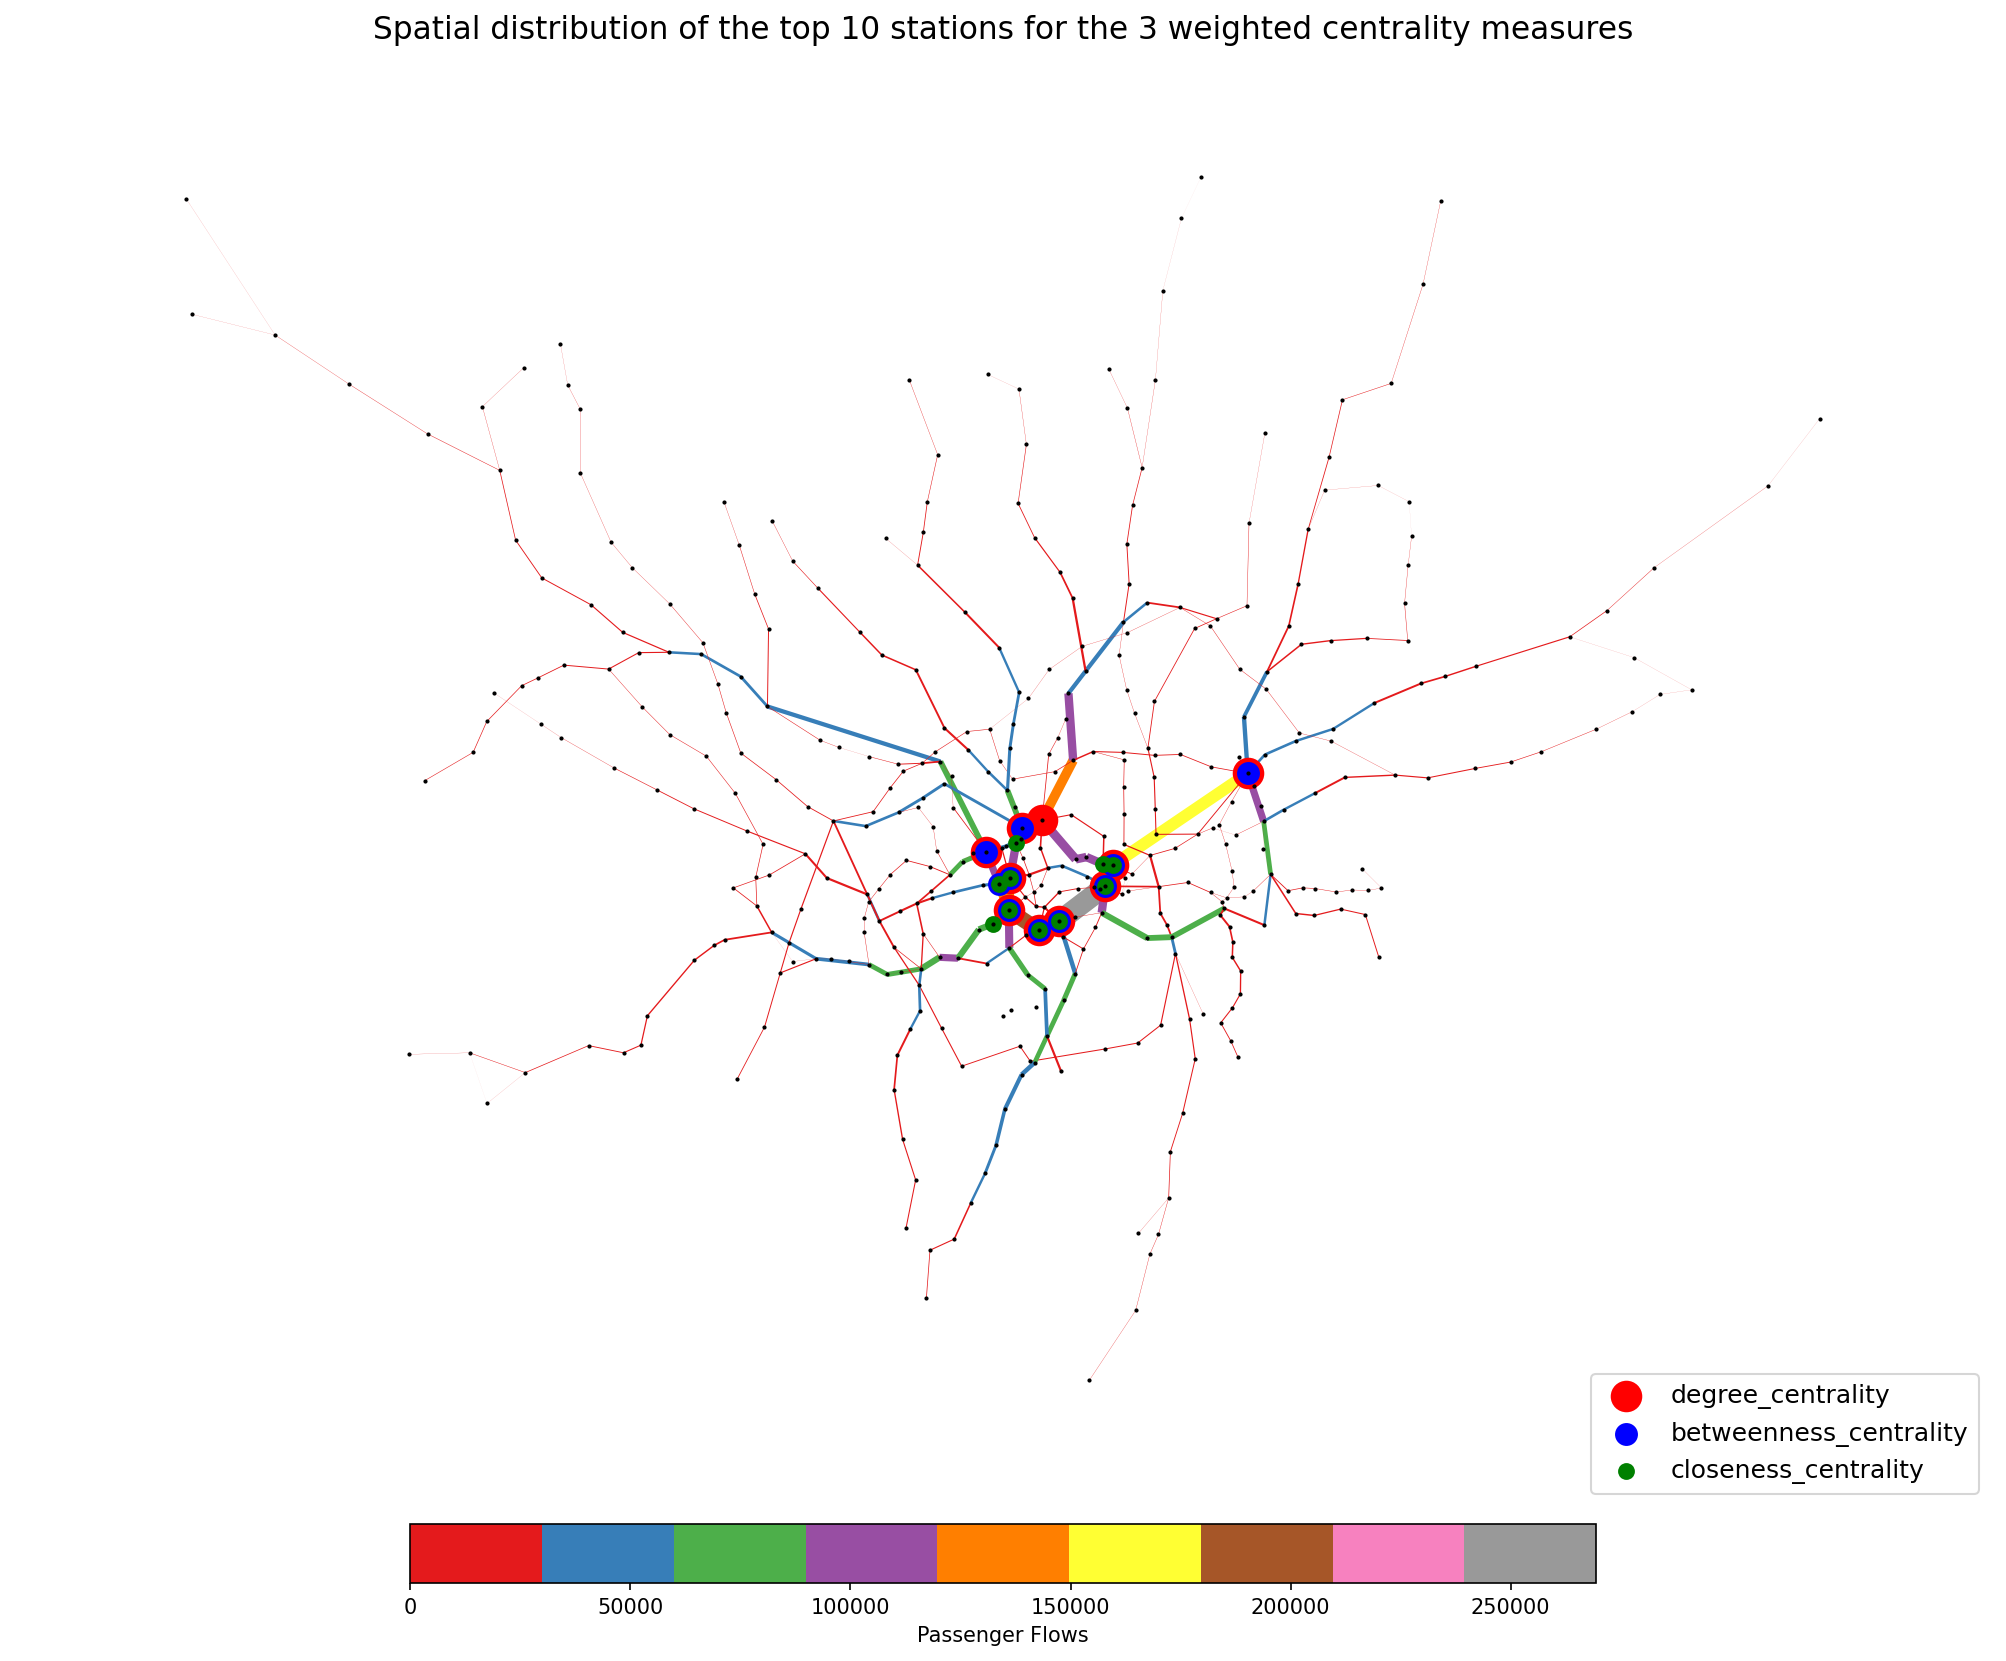

In [14]:
# Extract 'x' and 'y' values from 'coords' attribute
for node in G.nodes():
    coords = G.nodes[node]['coords'].split(',')
    G.nodes[node]['x'] = float(coords[0].strip("()"))
    G.nodes[node]['y'] = float(coords[1].strip("()"))

pos = {node: (G.nodes[node]['x'], G.nodes[node]['y']) for node in G.nodes()}

# Create a scatter plot of the stations
fig, ax = plt.subplots(figsize=(17, 15), dpi=150)
cmap = plt.cm.get_cmap("Set1")
flows_values = [data['flows'] for _, _, data in G.edges(data=True)]
flow_color = [cmap(i[2]['flows'] / max(flows_values)) for i in G.edges(data=True)]
flow_width = [(i[2]['flows'] / max(flows_values) * 10) for i in G.edges(data=True)]

edg = nx.draw_networkx_edges(G, pos, edge_color=flow_color, width=flow_width)
nx.draw_networkx_nodes(G, pos, node_color='black', node_size=1)

norm = plt.Normalize(min(flows_values), max(flows_values))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Passenger Flows", orientation="horizontal", shrink=0.6, pad=0.01)

# Define color and size for each centrality measure
colors = ['red', 'blue', 'green']
sizes = [200, 100, 50]
# Loop through the top 10 stations for each centrality measure
for i, df in enumerate([degree_ranked_weighted, betweenness_ranked_weighted, closeness_ranked_weighted]):
    # Get the x and y coordinates of each station
    x = [G.nodes[node]['x'] for node in df['station']]
    y = [G.nodes[node]['y'] for node in df['station']]

    # Plot the stations as a scatter plot with different color and size for each centrality measure
    ax.scatter(x, y, color=colors[i], s=sizes[i], label=df.columns[1])

# Add a title and legend to the plot
plt.title('Spatial distribution of the top 10 stations for the 3 weighted centrality measures', fontsize=15)
plt.legend(loc='lower right', fontsize=12)

# Hide the axis and show the plot
plt.axis('off')
plt.show()


#### II.2
> Now consider the measure for assessing the impact of node removal. Would you adjust the measure for a weighted network? If yes, how? Propose a different measure that would be better at assessing the impact of closing a station taking into consideration the passengers.

In [15]:
def weighted_node_removal_impact(G, node):
    # Create a copy of the graph and remove the specified node
    G_copy = G.copy()
    G_copy.remove_node(node)

    # Calculate the total flow in the original network
    total_flow = sum([G.edges[u, v]['flows'] for u, v in G.edges()])

    # Calculate the total flow in the modified network
    modified_total_flow = sum([G_copy.edges[u, v]['flows'] for u, v in G_copy.edges()])

    # Calculate the percentage reduction in total flow due to node removal
    reduction_percentage = ((total_flow - modified_total_flow) / total_flow)

    return reduction_percentage

In [16]:
# calculate the modified impact measure for each node and store the result in a dictionary
modified_impact_measures = {}
for node in G.nodes():
    modified_impact_measures[node] = weighted_node_removal_impact(G.copy(), node)
    # print(f"Removing {node} would reduce total flow by {modified_impact_measures[node]:.2f}%")

# sort the nodes by their impact measures in descending order
# sorted_nodes = sorted(modified_impact_measures.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_nodes_df = pd.DataFrame(sorted(modified_impact_measures.items(), key=lambda x: x[1], reverse=True)[:10],
                               columns=['station', 'impact'])
sorted_nodes_df['impact'] = sorted_nodes_df['impact'].apply(lambda x: f"{x:.2%}")

# # print the top 10 nodes with highest impact measures
# print(
#     "Top 10 nodes with highest impact measures:\n(The percentage reduction in total traffic caused by the removal of one of the stations)\n")
#
# for i, (node, impact) in enumerate(sorted_nodes[:10]):
#     print(f"Top {i + 1}: {node}: {impact:.2f}%")
#
# Set the index to start from 1
sorted_nodes_df.index = sorted_nodes_df.index + 1

# Generate markdown output
# print(
#     "Top 10 nodes with highest impact measures:\n(The percentage reduction in total traffic caused by the removal of one of the stations)\n")
# print(df_to_markdown(sorted_nodes_df, index=True, header=True))

# Display the sorted nodes dataframe
sorted_nodes_df


,station,impact
1,Bank and Monument,7.14%
2,Green Park,6.43%
3,Waterloo,5.82%
4,King's Cross St. Pancras,4.82%
5,Westminster,4.35%
6,Liverpool Street,4.25%
7,Stratford,3.71%
8,Euston,3.66%
9,Baker Street,3.21%
10,Oxford Circus,3.05%


In [17]:
def adjusted_centrality(G, weight='flows'):
    pagerank_scores = nx.pagerank(G, weight=weight)
    adjusted_centrality = {}

    for node in G.nodes:
        weighted_degree = sum([d.get(weight, 1) for _, _, d in G.edges(node, data=True)])
        if pagerank_scores[node] == 0:
            adjusted_centrality[node] = 0
        else:
            adjusted_centrality[node] = weighted_degree / pagerank_scores[node]

    return adjusted_centrality


G_copy = G.copy()
# Rank nodes by adjusted centrality measure
sorted_nodes = sorted(adjusted_centrality(G_copy).items(), key=lambda x: x[1], reverse=True)
sorted_nodes_df2 = pd.DataFrame(sorted_nodes[:10], columns=['station', 'adjusted centrality'])
sorted_nodes_df2['adjusted centrality'] = sorted_nodes_df2['adjusted centrality'].astype('str')
# # Print top 10 nodes by adjusted centrality measure
# print("Top 10 nodes with highest adjusted centrality measures:\n")
# for i in range(10):
#     print("Top {}: {}: {:.3f}".format(i + 1, sorted_nodes[i][0], sorted_nodes[i][1]))

# Set the index to start from 1
sorted_nodes_df2.index = sorted_nodes_df2.index + 1
# Generate markdown output
# print("Top 10 nodes with highest adjusted centrality measures\n")
# print(df_to_markdown(sorted_nodes_df2, index=True, header=True))
sorted_nodes_df2

,station,adjusted centrality
1,Green Park,65424602.45528399
2,Westminster,64714105.45829721
3,Hyde Park Corner,61920252.26186064
4,Victoria,58949981.58683483
5,Waterloo,57846883.788449906
6,Knightsbridge,57454015.02445731
7,Barbican,56616116.30083641
8,Oxford Circus,55051541.97973308
9,Farringdon,54362334.84642131
10,Pimlico,53629149.64118917



To adjust the centrality measure for a weighted network, we need to take into account the edge weights in addition to the number of neighbors of each node. One way to do this is to use the PageRank algorithm, which is a variant of eigenvector centrality that takes into account the weights of the edges.

We can compute the PageRank scores for each node in the network using the pagerank function from the networkx library.

adjusted_centrality[node] refers to the adjusted centrality measure for a node, which is computed by dividing its degree by its PageRank score.

The original PageRank algorithm was designed for a weighted network, where the weight of each edge represents its importance or relevance. However, in the case of an unweighted network, as in this exercise, each edge is considered to have the same weight. To adjust the centrality measure for a weighted network, we can consider the edge weights when computing the PageRank score, and then divide the node degree by this adjusted PageRank score.

In the given code, the pagerank_scores[node] represents the PageRank score of the node, and G.degree(node) represents the degree of the node (i.e., the number of edges connected to the node). So, the adjusted centrality measure can be interpreted as the ratio of the node degree to its importance or relevance in the network, considering the edge weights through the PageRank algorithm.

By recomputing the adjusted centrality measure for all nodes in the network using the above formula, we obtain a new ranking of the nodes based on their adjusted centrality scores. The 10 nodes with the highest adjusted centrality scores will represent the most important nodes in the network according to this adjusted measure.



#### II.3
> Remove only the 3 highest ranked nodes according to the best performing centrality measure found in I.1. Evaluate the impact according to the 2 measures in II.2. Repeat the experiment for the highest 3 ranked nodes using the adjusted measure. Critically discuss which station closure will have the largest impact on passengers, referring to your measures and results.

In [18]:
# Remove the 3 highest ranked nodes according to the best performing centrality measure found in I.1
def remove_and_evaluate_impact(G, top_nodes, num_to_remove):
    # Create a copy of the graph
    G_copy = G.copy()
    nodes_to_remove = []

    # Check if top_nodes is a dictionary, then get the top num_to_remove nodes
    if isinstance(top_nodes, dict):
        nodes_to_remove = [node for node, _ in
                           sorted(top_nodes.items(), key=lambda x: x[1], reverse=True)[:num_to_remove]]
    # Check if top_nodes is a DataFrame, then get the top num_to_remove nodes
    elif isinstance(top_nodes, pd.DataFrame):
        nodes_to_remove = top_nodes.iloc[:num_to_remove]['station'].tolist()

    # Remove the selected nodes from the copied graph
    for node in nodes_to_remove:
        G_copy.remove_node(node)

    # Calculate the average percentage reduction in total flow due to nodes removal
    reduction_percentage = sum(weighted_node_removal_impact(G, node) for node in nodes_to_remove) / num_to_remove

    # Return the results as a dictionary
    return {
        "connected_components": count_connected_components(G_copy),
        "size_largest_component": size_largest_component(G_copy),
        "reduction_percentage": "{x:.2%}".format(x=reduction_percentage),
    }


In [19]:


impact_unweighted = remove_and_evaluate_impact(G, bet_cen_df, 3)
impact_weighted = remove_and_evaluate_impact(G, betweenness_ranked_weighted, 3)
impact_reduction = remove_and_evaluate_impact(G, sorted_nodes_df, 3)
impact_adjusted = remove_and_evaluate_impact(G, sorted_nodes_df2, 3)

print("Impact of top 3 nodes removal (unweighted):\n", impact_unweighted)
print("Impact of top 3 nodes removal (weighted):\n", impact_weighted)
print("Impact of top 3 nodes removal (Reduction):\n", impact_reduction)
print("Impact of top 3 nodes removal (adjusted):\n", impact_adjusted)


Impact of top 3 nodes removal (unweighted):
 {'connected_components': 3, 'size_largest_component': 377, 'reduction_percentage': '5.03%'}
Impact of top 3 nodes removal (weighted):
 {'connected_components': 1, 'size_largest_component': 398, 'reduction_percentage': '6.46%'}
Impact of top 3 nodes removal (Reduction):
 {'connected_components': 1, 'size_largest_component': 398, 'reduction_percentage': '6.46%'}
Impact of top 3 nodes removal (adjusted):
 {'connected_components': 1, 'size_largest_component': 398, 'reduction_percentage': '4.15%'}


## Part 2: Spatial Interaction models

### III. Models and calibration

III.1. Briefly introduce the spatial interaction models covered in the lectures using equations and defining the terms, taking particular care in explaining the role of the parameters.

III.2. Using the information of population, jobs and flows, select a spatial interaction model and calibrate the parameter for the cost function (usually denoted as ). It is essential that you justify the model selected.

In [32]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load data
london_flows = pd.read_csv(
    '/Users/zonghe/Documents/Modules/Term2/CASA0002 Urban Simulation/week10/week10practice/outputs/london_flows.csv')
OD_matrix = pd.read_csv(
    '/Users/zonghe/Documents/Modules/Term2/CASA0002 Urban Simulation/week10/week10practice/outputs/OD_matrix.csv')

G = nx.read_graphml(
    '/Users/zonghe/Documents/Modules/Term2/CASA0002 Urban Simulation/week10/week10practice/outputs/london.graph')

df = london_flows

# Scale the input features
scaler = MinMaxScaler()
df['scaled_distance'] = scaler.fit_transform(df['distance'].values.reshape(-1, 1))
df['scaled_population'] = scaler.fit_transform(df['population'].values.reshape(-1, 1))
df['scaled_jobs'] = scaler.fit_transform(df['jobs'].values.reshape(-1, 1))
df['scaled_flows'] = scaler.fit_transform(df['flows'].values.reshape(-1, 1))
print(df.head(10))

  station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.410852   
1     Abbey Road             Beckton      1         599    442  8510.047006   
2     Abbey Road           Blackwall      3         599    665  3775.359872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.404941   
4     Abbey Road        Canning Town     37         599  15428  2228.874185   
5     Abbey Road        Crossharbour      1         599   1208  6686.335036   
6     Abbey Road        Custom House      0         599    845  3824.789936   
7     Abbey Road          Cutty Sark      2         599   1748  8503.736582   
8     Abbey Road              Cyprus      7         599    850  6532.037185   
9     Abbey Road         Devons Road      1         599    611  3958.290432   

   scaled_distance  scaled_population  scaled_jobs  scaled_flows  
0         0.134110           0.008891     1.000000      0.00000

In [21]:
# Extract 'x' and 'y' values from 'coords' attribute
for node in G.nodes():
    coords = G.nodes[node]['coords'].split(',')
    G.nodes[node]['x'] = float(coords[0].strip("()"))
    G.nodes[node]['y'] = float(coords[1].strip("()"))

# Compute metrics (e.g., centrality, clustering)
centrality = nx.betweenness_centrality(G, weight='scaled_distance')
clustering = nx.clustering(G)

# Optimize the network (e.g., by removing edges with low flows)
# threshold = 10
threshold = df['flows'].quantile(0.75)
G_optimized = G.copy()
for u, v, data in G.edges(data=True):
    if data['flows'] < threshold:
        G_optimized.remove_edge(u, v)

# Analyze the optimized network
centrality_optimized = nx.betweenness_centrality(G_optimized, weight='scaled_distance')
clustering_optimized = nx.clustering(G_optimized)


# Calculate network metrics for comparison
# Function to calculate the average shortest path length of a connected graph
def average_shortest_path_length_connected(graph):
    lengths = []
    for component in nx.connected_components(graph):
        subgraph = graph.subgraph(component)
        lengths.append(nx.average_shortest_path_length(subgraph))
    return sum(lengths) / len(lengths)


# Calculate the average shortest path length for the original and optimized networks
avg_shortest_path_length = average_shortest_path_length_connected(G)
avg_shortest_path_length_optimized = average_shortest_path_length_connected(G_optimized)
# Calculate the average degree for the original and optimized networks
avg_centrality = sum(centrality.values()) / len(centrality)
avg_centrality_optimized = sum(centrality_optimized.values()) / len(centrality_optimized)
# Calculate the average clustering coefficient for the original and optimized networks
avg_clustering = sum(clustering.values()) / len(clustering)
avg_clustering_optimized = sum(clustering_optimized.values()) / len(clustering_optimized)
# Calculate the average number of components for the original and optimized networks
num_components = nx.number_connected_components(G)
num_components_optimized = nx.number_connected_components(G_optimized)


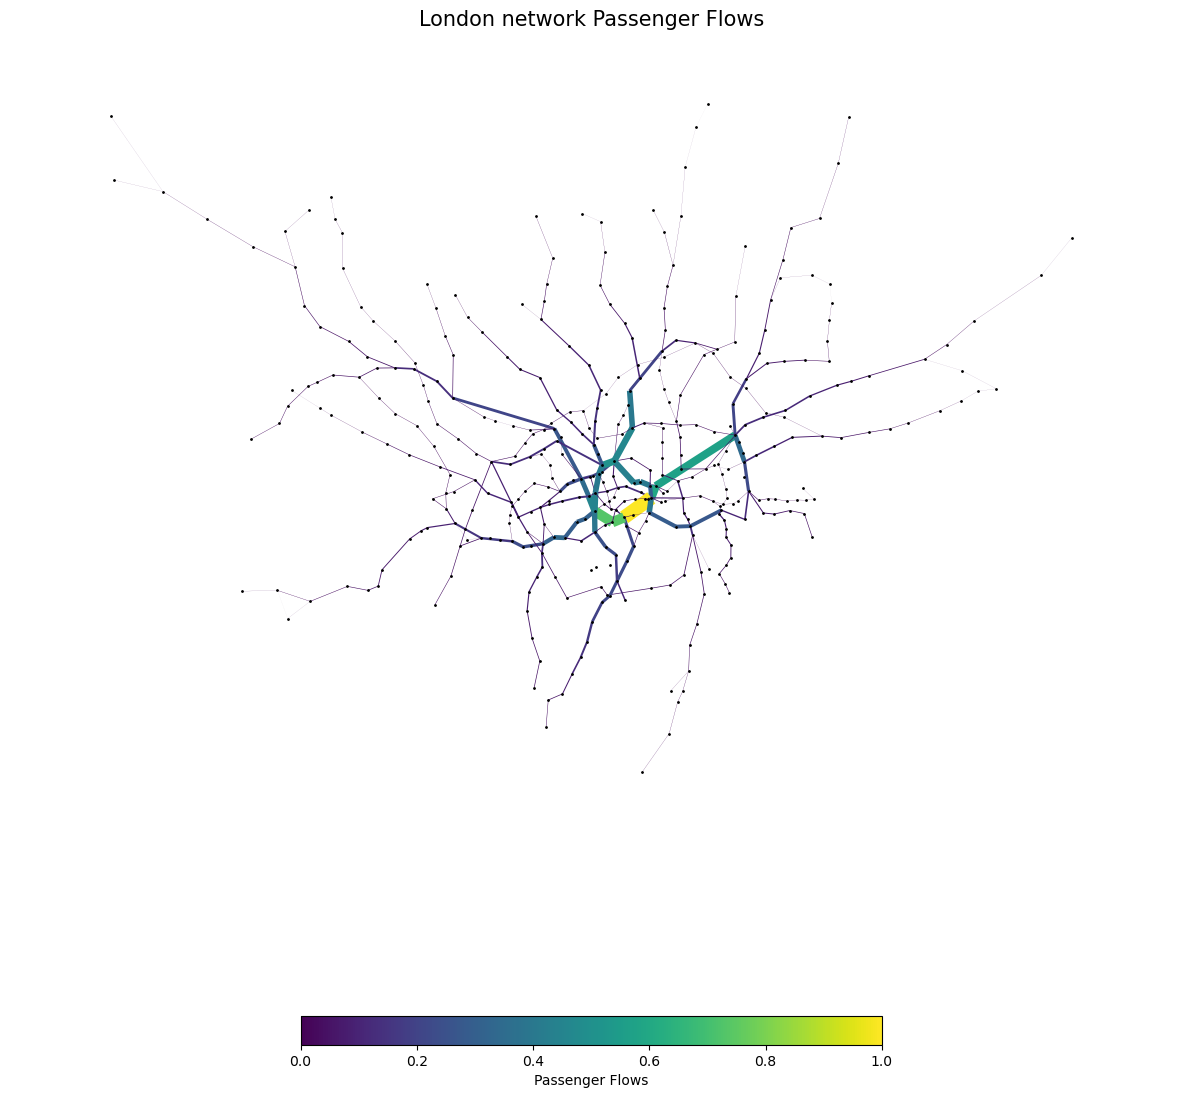

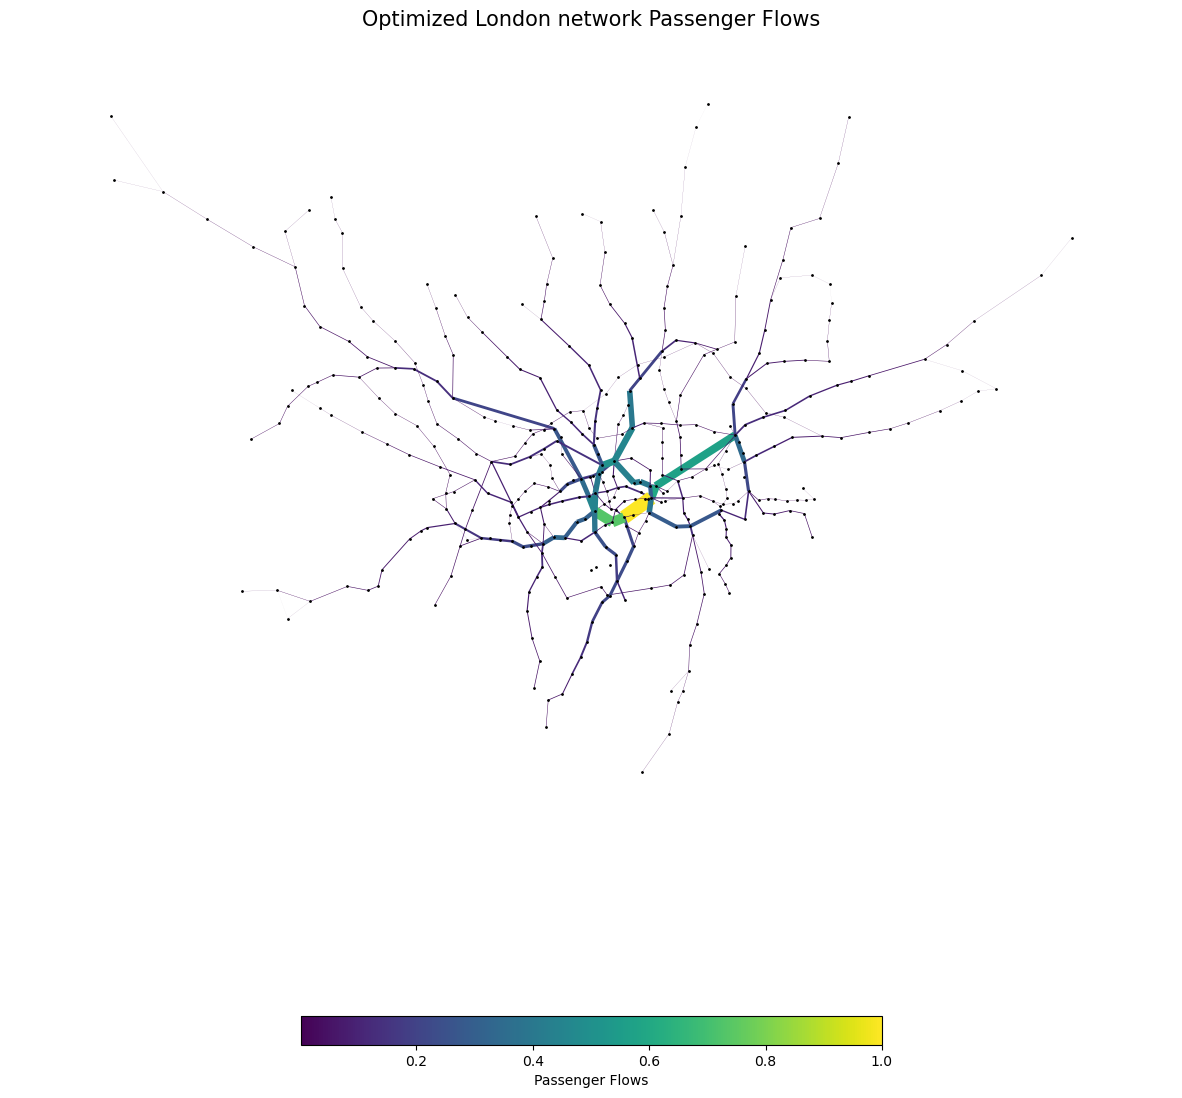

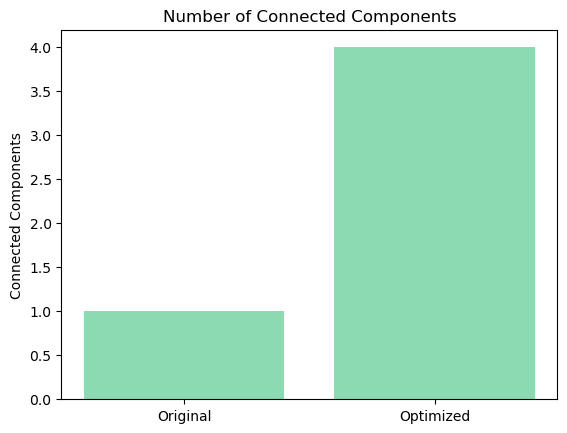

Number of Connected Components:
Original Network: 1.00
Optimized Network: 4.00



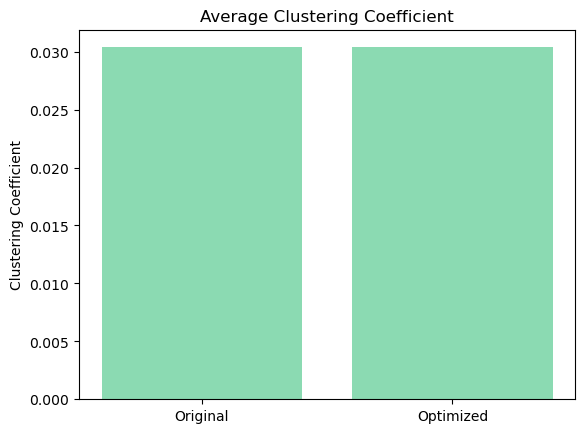

Average Clustering Coefficient:
Original Network: 0.03
Optimized Network: 0.03



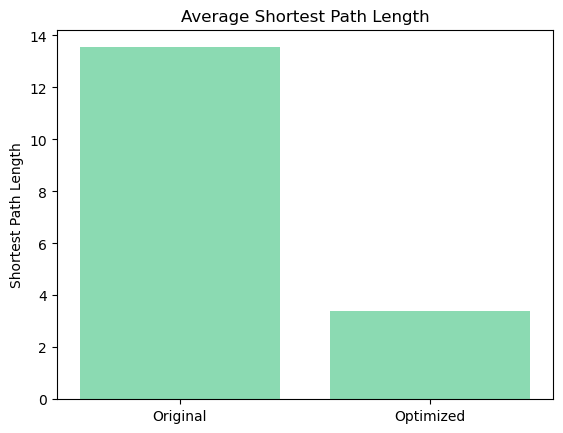

Average Shortest Path Length:
Original Network: 13.55
Optimized Network: 3.39



In [22]:
# Function to plot the network
def plot_graph_flows(graph, title):
    pos = {node: (graph.nodes[node]['x'], graph.nodes[node]['y']) for node in graph.nodes()}
    flows_values = [data['flows'] for _, _, data in graph.edges(data=True)]
    flow_color = [(i[2]['flows'] / max(flows_values)) for i in graph.edges(data=True)]
    flow_width = [(i[2]['flows'] / max(flows_values) * 10) for i in graph.edges(data=True)]

    fig, ax = plt.subplots(figsize=(15, 15))
    edg = nx.draw_networkx_edges(graph, pos, edge_color=flow_color, width=flow_width)
    nx.draw_networkx_nodes(graph, pos, node_color='black', node_size=1)
    plt.colorbar(edg, label="Passenger Flows", orientation="horizontal", shrink=0.5)
    plt.axis("off")
    plt.title(title, fontsize=15)
    plt.show()


# Visualize the original network with passenger flows
plot_graph_flows(G, "London network Passenger Flows")

# Visualize the optimized network with passenger flows
plot_graph_flows(G_optimized, "Optimized London network Passenger Flows")


# Function to create a bar plot of network metrics
def plot_metrics(metrics, labels, title, ylabel):
    plt.bar(labels, metrics)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()


# visualize the network metrics
plot_metrics([num_components, num_components_optimized], ['Original', 'Optimized'], 'Number of Connected Components',
             'Connected Components')
print(
    f'Number of Connected Components:\nOriginal Network: {num_components:.2f}\nOptimized Network: {num_components_optimized:.2f}\n')

plot_metrics([avg_clustering, avg_clustering_optimized], ['Original', 'Optimized'], 'Average Clustering Coefficient',
             'Clustering Coefficient')
print(
    f'Average Clustering Coefficient:\nOriginal Network: {avg_clustering:.2f}\nOptimized Network: {avg_clustering_optimized:.2f}\n')

plot_metrics([avg_shortest_path_length, avg_shortest_path_length_optimized], ['Original', 'Optimized'],
             'Average Shortest Path Length', 'Shortest Path Length')
print(
    f'Average Shortest Path Length:\nOriginal Network: {avg_shortest_path_length:.2f}\nOptimized Network: {avg_shortest_path_length_optimized:.2f}\n')




london_flows：这是一个包含伦敦地铁网络中每条边的客流量数据的Pandas DataFrame。客流量是指在网络中经过某条边的乘客数量。在这个案例中，我们通过分析客流量来了解网络中的拥挤情况以及哪些线路最繁忙。
OD_matrix：这是一个包含伦敦地铁网络中起点和终点站之间的乘客流量数据的Pandas DataFrame。通过分析OD矩阵，我们可以了解乘客的出行需求以及乘客从一个地点到另一个地点的流动情况。
G：这是一个表示伦敦地铁网络的NetworkX图。图中的节点表示地铁站，边表示地铁线路。这个图用于计算和分析地铁网络的拓扑结构和各种指标。
threshold：这是一个用于优化网络的流量阈值。在这个案例中，阈值设置为10，表示我们将移除流量低于10的边。这个参数用于优化网络，通过移除低流量的边来减小拥挤情况。
G_optimized：这是一个优化后的伦敦地铁网络图，从原始网络G中移除了低流量的边。通过对比G和G_optimized的各项指标，我们可以了解优化的效果。
centrality 和 centrality_optimized：这分别是原始网络G和优化后的网络G_optimized的介数中心性指标。介数中心性反映了节点在网络中的重要性，值越高表示节点在网络中的作用越大。在伦敦地铁案例中，它可以帮助我们识别地铁网络中的关键站点。
clustering 和 clustering_optimized：这分别是原始网络G和优化后的网络G_optimized的聚类系数。聚类系数表示网络中节点之间的紧密程度，值越高表示节点之间连接越紧密。在伦敦地铁案例中，它可以帮助我们了解地铁网络的局部连接情况。
avg_shortest_path_length 和 avg_shortest_path_length_optimized：这分别是原始网络G和优化后的网络G_optimized的平均最短路径长度。最短路径长度是指在网络中从一个节点到另一个节点所需经过的最小距离。在伦敦地铁案例中，这个指标可以帮助我们了解乘客在地铁网络中的平均出行时间。
num_components 和 num_components_optimized：这分别是原始网络G和优化后的网络G_optimized的连接组件数量。连接组件是指网络中相互连接的节点组成的子集。在伦敦地铁案例中，连接组件数量可以帮助我们了解地铁网络的连通性。较多的连接组件意味着网络中存在相对独立的部分，可能会导致乘客需要在不同部分之间换乘。优化目标是使连接组件数量降低，从而提高地铁网络的连通性。

以下是对伦敦地铁网络分析结果的解释：
连接组件数量 (Number of Connected Components)：
原始网络中的连接组件数量为1，这意味着整个地铁网络是连通的，没有孤立的部分。优化后的网络中连接组件数量增加到4，表明在移除低流量边的过程中，网络变得不再完全连通，出现了一些相对独立的子网络。这可能导致乘客在这些独立子网络之间换乘时需要花费更多时间。
平均聚类系数 (Average Clustering Coefficient)：
原始网络和优化后的网络的平均聚类系数均为0.03，这意味着优化过程并未改变网络节点间的紧密程度。平均聚类系数较低表明地铁网络的局部连接性较弱，可能需要在关键区域增加新的线路或站点以提高网络的连通性。
平均最短路径长度 (Average Shortest Path Length)：
原始网络的平均最短路径长度为13.55，而优化后的网络显著降低至3.39。这一结果初看上去可能让人觉得优化后的网络表现更好，但实际上这一指标可能产生误导。由于优化后的网络的连接组件数量增加，部分节点可能无法通过原有的最短路径到达，导致计算平均最短路径长度时只考虑了局部的最短路径，从而使得结果显著降低。实际上，在优化后的网络中，乘客可能需要在不同的连接组件之间换乘，这会增加总的出行时间。
综合分析结果来看，优化过程在一定程度上可能导致了网络连通性的降低。在实际应用中，我们需要权衡优化目标（如减少拥挤）与网络连通性的关系，避免过度优化导致的实际出行困难。这些分析结果可以为交通规划者提供有价值的信息，以便在决策过程中调整和优化地铁网络

Gravity model parameters:
Best cost function: logarithmic_cost
10 fold for cross-validation
Best error: 3.118067691624025e-05
Best parameters: a=1.146, b=1.165, c=0.131

Meaning of the parameters:
a: controls the effect of population on the flows
b: controls the effect of jobs on the flows
c: controls the impact of distance on the flows through the cost function


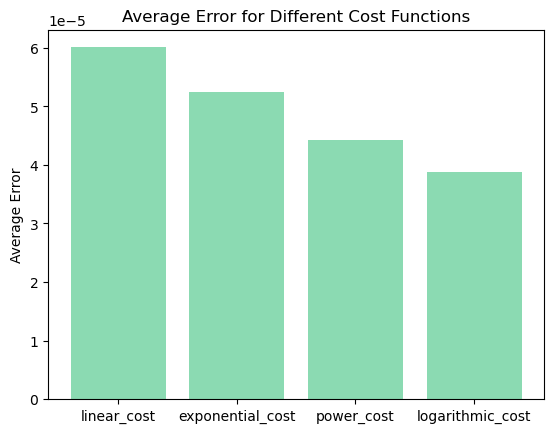

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from scipy.optimize import minimize, Bounds

# Load data
df = london_flows.copy()


# Define the different cost functions to try
def linear_cost(distance, c):
    return c * distance


def exponential_cost(distance, c):
    return np.exp(-c * distance)


def power_cost(distance, c):
    # Add a small value to distance to avoid division by zero issues
    epsilon = 1e-9
    return np.power(distance + epsilon, -c)


def logarithmic_cost(distance, c, eps=1e-6):
    return -c * np.log(distance + eps)


# Define the gravity model
def gravity_model(distance, a, b, c, cost_function, population, jobs):
    return cost_function(distance, c) * np.power(population, a) * np.power(jobs, b)


# Define the objective function for cross-validation
def objective_function(params, X_train, y_train, X_test, y_test, cost_function):
    a, b, c = params
    y_pred_train = gravity_model(X_train, a, b, c, cost_function, df.loc[train_index, 'scaled_population'],
                                 df.loc[train_index, 'scaled_jobs'])
    y_pred_test = gravity_model(X_test, a, b, c, cost_function, df.loc[test_index, 'scaled_population'],
                                df.loc[test_index, 'scaled_jobs'])
    train_error = np.mean(np.square(y_train - y_pred_train))
    test_error = np.mean(np.square(y_test - y_pred_test))
    return (train_error + test_error) / 2


df = df[df['distance'] != 0]
df.reset_index(drop=True, inplace=True)

# Perform cross-validation
kf = KFold(n_splits=10, shuffle=True)
best_error = np.inf
best_cost_function = None
best_params = None
bounds = Bounds([0, 0, 0], [10, 10, 10])

params_list = []
cost_functions = [linear_cost, exponential_cost, power_cost, logarithmic_cost]
cost_function_errors = {}
for cost_function in cost_functions:
    errors = []
    train_test_splits = list(kf.split(df))
    for train_index, test_index in train_test_splits:
        X_train = df.loc[train_index, 'scaled_distance']
        y_train = df.loc[train_index, 'scaled_flows']
        X_test = df.loc[test_index, 'scaled_distance']
        y_test = df.loc[test_index, 'scaled_flows']
        result = minimize(objective_function, x0=[1, 1, 0.5], args=(X_train, y_train, X_test, y_test, cost_function)
                          # ,bounds=bounds
                          )
        params = result.x
        error = result.fun
        params_list.append((cost_function.__name__, params, error))
        errors.append(error)
    avg_error = np.mean(errors)
    cost_function_errors[cost_function.__name__] = avg_error
    if avg_error < best_error:
        best_error = avg_error
        best_cost_function = cost_function
        best_params = params_list[-len(train_test_splits):]

# Select the best set of parameters
best_params.sort(key=lambda x: x[2])
best_params = best_params[0]
best_a, best_b, best_c = best_params[1]

# Print the best result
print('Gravity model parameters:')
print(f"Best cost function: {best_cost_function.__name__}")
print(f"{kf.n_splits} fold for cross-validation")
print(f"Best error: {best_params[2]}")
print(f"Best parameters: a={best_a:.3f}, b={best_b:.3f}, c={best_c:.3f}")

# Print the meanings of a, b, and c
print("\nMeaning of the parameters:")
print(f"a: controls the effect of population on the flows")
print(f"b: controls the effect of jobs on the flows")
print(f"c: controls the impact of distance on the flows through the cost function")

plt.bar(cost_function_errors.keys(), cost_function_errors.values())
plt.ylabel("Average Error")
plt.title("Average Error for Different Cost Functions")
plt.show()

R² score: 0.400


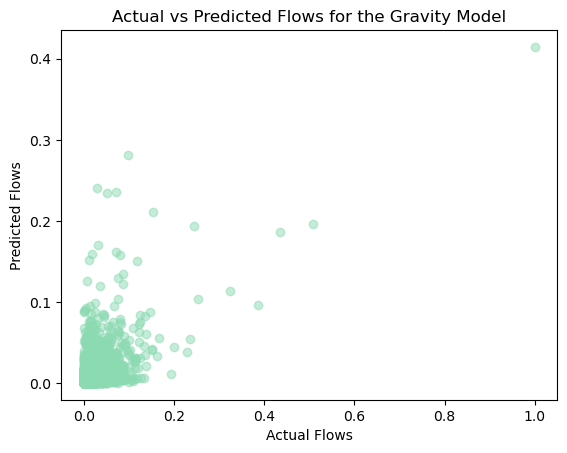

In [37]:
from sklearn.metrics import r2_score

# Define a function to compute the R2 score for the best cost function and parameters
def compute_r2_score(df, cost_function, a, b, c):
    X = df['scaled_distance']
    y = df['scaled_flows']
    y_pred = gravity_model(X, a, b, c, cost_function, df['scaled_population'], df['scaled_jobs'])
    return r2_score(y, y_pred)

# Compute the R2 score
r2 = compute_r2_score(df, best_cost_function, best_a, best_b, best_c)
print(f"R² score: {r2:.3f}")

# Define a function to create a scatter plot of the actual vs predicted values
def plot_actual_vs_predicted(df, cost_function, a, b, c):
    X = df['scaled_distance']
    y = df['scaled_flows']
    y_pred = gravity_model(X, a, b, c, cost_function, df['scaled_population'], df['scaled_jobs'])

    plt.scatter(y, y_pred, alpha=0.5)
    plt.xlabel('Actual Flows')
    plt.ylabel('Predicted Flows')
    plt.title('Actual vs Predicted Flows for the Gravity Model')
    plt.show()

# Create the scatter plot
plot_actual_vs_predicted(df, best_cost_function, best_a, best_b, best_c)


### IV.1. Scenario A: 50% decrease in jobs at Canary Wharf
assume that Canary Wharf has a 50% decrease in jobs after Brexit. Using the calibrated parameter , compute the new flows for scenario A. Make sure the number of commuters is conserved, and explain how you ensured this.

In [73]:
# Identify Canary Wharf in the dataset
canary_wharf_index = df[df['station_destination'] == 'Canary Wharf'].index

# Make a copy of the original dataset and reduce jobs by 50% at Canary Wharf
df_scenario_A = df.copy()
df_scenario_A.loc[canary_wharf_index, 'scaled_jobs'] *= 0.5

# Scale the updated jobs column
df_scenario_A['scaled_jobs'] = scaler.transform(df_scenario_A['scaled_jobs'].values.reshape(-1, 1))

# Compute the new flows using the updated jobs data and the calibrated parameters
y_pred_scenario_A = gravity_model(df_scenario_A['scaled_distance'], best_a, best_b, best_c, best_cost_function,
                                  df_scenario_A['scaled_population'], df_scenario_A['scaled_jobs'])

# Normalize the new flows to conserve the number of commuters
total_original_flows = df['scaled_flows'].sum()
total_new_flows = y_pred_scenario_A.sum()
normalization_factor = total_original_flows / total_new_flows
y_pred_scenario_A_normalized = y_pred_scenario_A * normalization_factor

# Update the dataset with the new normalized flows
df_scenario_A['new_flows'] = y_pred_scenario_A_normalized

# Print the results for Canary Wharf
print("Scenario A: 50% decrease in jobs at Canary Wharf")
print(f"Total flows of the network: {df_scenario_A['flows'].sum():.0f}")
print(
    f"Total new flows to Canary Wharf: {df_scenario_A[df_scenario_A['station_destination'] == 'Canary Wharf']['new_flows'].sum():.0f}, decreased by {100 - df_scenario_A[df_scenario_A['station_destination'] == 'Canary Wharf']['new_flows'].sum() / df[df['station_destination'] == 'Canary Wharf']['scaled_flows'].sum() * 100:.0f}%")
print(
    f"Total new flows from Canary Wharf: {df_scenario_A[df_scenario_A['station_origin'] == 'Canary Wharf']['new_flows'].sum():.0f}, increased by {df_scenario_A[df_scenario_A['station_origin'] == 'Canary Wharf']['new_flows'].sum() / df[df['station_origin'] == 'Canary Wharf']['scaled_flows'].sum() * 100 - 100:.0f}%")
df_scenario_A[df_scenario_A['station_destination'] == 'Canary Wharf'][
    ['station_origin', 'station_destination', 'scaled_flows', 'new_flows']]
print(df_scenario_A[['station_origin', 'station_destination', 'scaled_flows', 'new_flows']].head(10))



Scenario A: 50% decrease in jobs at Canary Wharf
Total flows of the network: 1542283
Total new flows to Canary Wharf: 2, decreased by 40%
Total new flows from Canary Wharf: 1, increased by 22%
  station_origin station_destination  scaled_flows  new_flows
0     Abbey Road   Bank and Monument      0.000000   0.002223
1     Abbey Road             Beckton      0.000063   0.000005
2     Abbey Road           Blackwall      0.000188   0.000012
3     Abbey Road        Canary Wharf      0.000063   0.000872
4     Abbey Road        Canning Town      0.002320   0.000549
5     Abbey Road        Crossharbour      0.000063   0.000019
6     Abbey Road        Custom House      0.000000   0.000016
7     Abbey Road          Cutty Sark      0.000125   0.000026
8     Abbey Road              Cyprus      0.000439   0.000013
9     Abbey Road         Devons Road      0.000063   0.000011


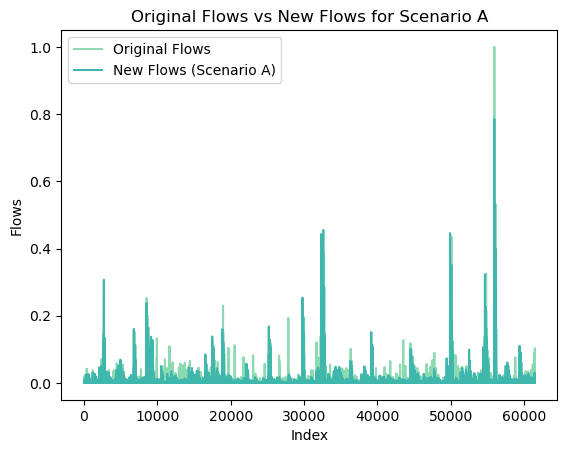

R² between original flows and new flows: 0.088


In [49]:
import numpy as np
from sklearn.metrics import r2_score

def plot_actual_vs_new_flows_line(df, new_flows_col):
    plt.plot(df['scaled_flows'], label='Original Flows')
    plt.plot(df[new_flows_col], label='New Flows (Scenario A)')
    plt.xlabel('Index')
    plt.ylabel('Flows')
    plt.title('Original Flows vs New Flows for Scenario A')
    plt.legend()
    plt.show()

def calculate_r2(df, new_flows_col):
    r2 = r2_score(df['scaled_flows'], df[new_flows_col])
    return r2

plot_actual_vs_new_flows_line(df_scenario_A, 'new_flows')
r2 = calculate_r2(df_scenario_A, 'new_flows')
print(f"R² between original flows and new flows: {r2:.3f}")


/var/folders/1k/27mkp8bj3ps60c3nmr7rbqzh0000gn/T/ipykernel_42290/1797267482.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Passenger Changed Flows (The new flow - the original flow)", orientation="horizontal", shrink=0.6, pad=0.01)


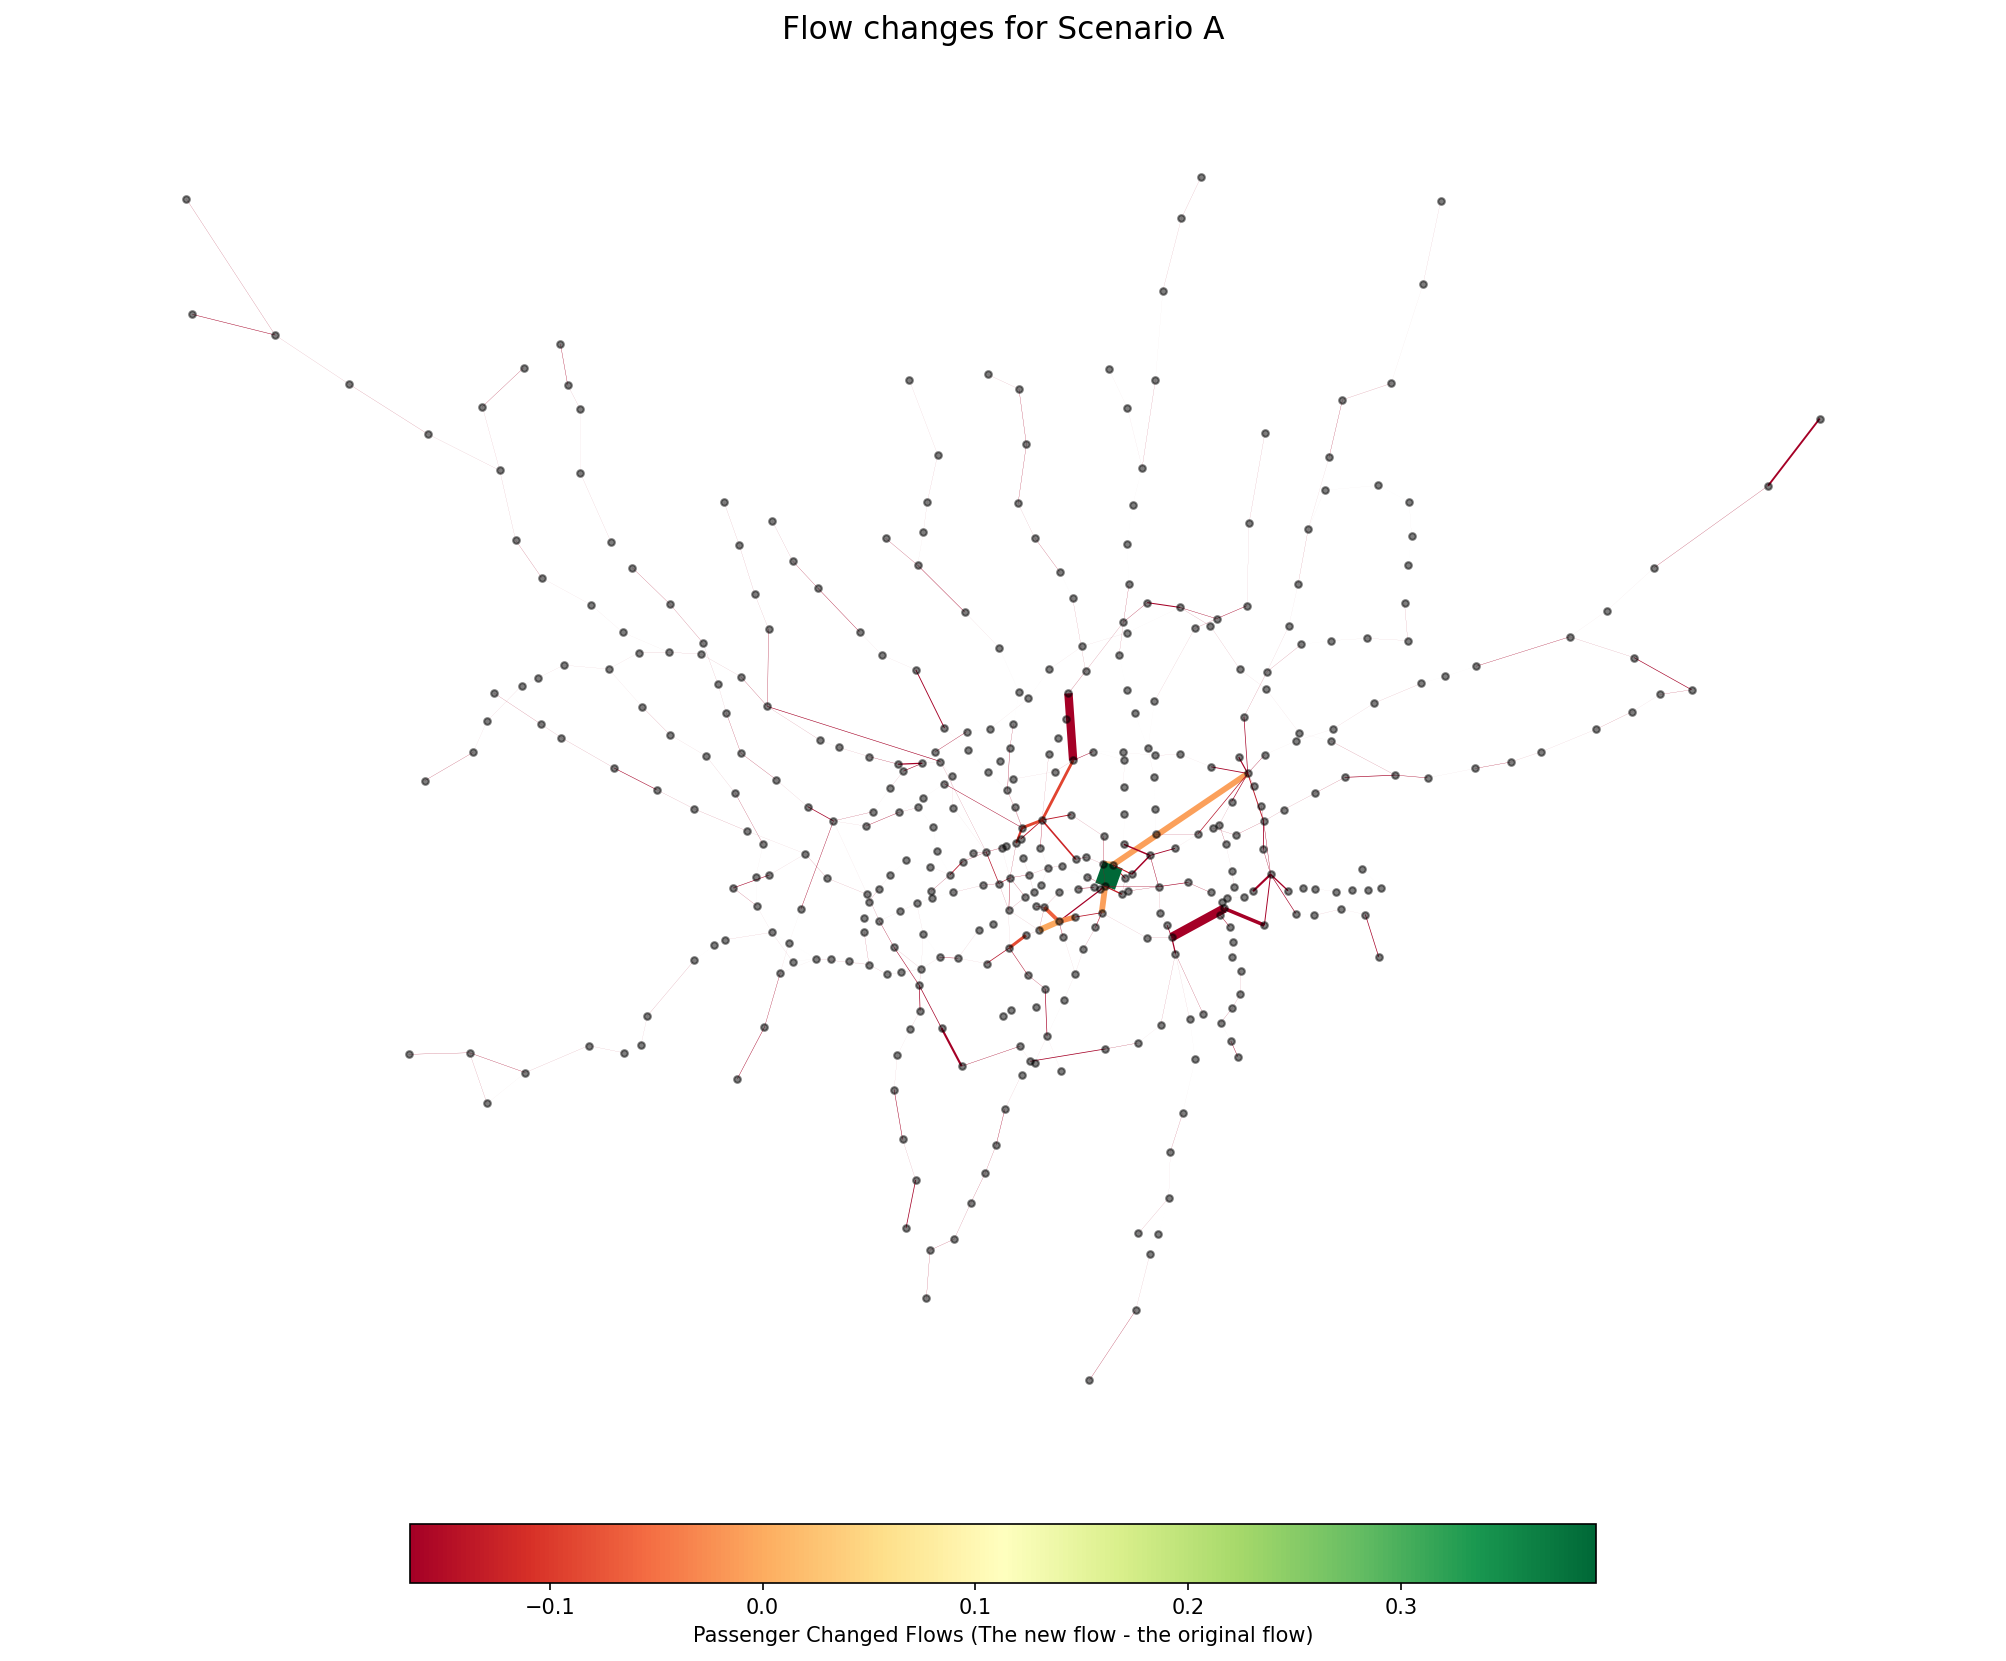

In [104]:

# 加载地铁网络图
G_scenario_A = G.copy()


# Add new_flows and flows_diff attributes to edges of the graph for Scenario A
for u, v, data in G_scenario_A.edges(data=True):
    new_flow_value_df = df_scenario_A.loc[(df_scenario_A['station_origin'] == u) &
                                        (df_scenario_A['station_destination'] == v), 'new_flows']
    if not new_flow_value_df.empty:
        new_flow_value = new_flow_value_df.iloc[0]
        flow_value = df_scenario_A.loc[(df_scenario_A['station_origin'] == u) &
                                     (df_scenario_A['station_destination'] == v), 'scaled_flows'].iloc[0]
        data['new_flows'] = new_flow_value
        data['flows_diff'] = new_flow_value - flow_value
    else:
        data['new_flows'] = 0
        data['flows_diff'] = 0

# 将每个站点的x和y坐标添加到节点属性中
for node in G_scenario_A.nodes():
    coords = G_scenario_A.nodes[node]['coords'].split(',')
    G_scenario_A.nodes[node]['x'] = float(coords[0].strip("()"))
    G_scenario_A.nodes[node]['y'] = float(coords[1].strip("()"))

# 绘制热力图
pos = {station: (G_scenario_A.nodes[station]['x'], G_scenario_A.nodes[station]['y']) for station in G_scenario_A.nodes()}
fig, ax = plt.subplots(figsize=(17, 15), dpi=150)
cmap = plt.cm.get_cmap("RdYlGn")
flows_values = [data['flows_diff'] for _, _, data in G_scenario_A.edges(data=True) if 'flows_diff' in data]
flow_color = [cmap(i['flows_diff'] / max(flows_values)) for _, _, i in G_scenario_A.edges(data=True) if 'flows_diff' in i]
flow_width = [i['flows_diff'] / max(flows_values) * 10 for _, _, i in G_scenario_A.edges(data=True) if 'flows_diff' in i]
edg = nx.draw_networkx_edges(G_scenario_A, pos, edge_color=flow_color, width=flow_width)
nx.draw_networkx_nodes(G_scenario_A, pos, node_size=10, node_color='black', alpha=0.5)
norm = plt.Normalize(min(flows_values), max(flows_values))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Passenger Changed Flows (The new flow - the original flow)", orientation="horizontal", shrink=0.6, pad=0.01)
plt.title("Flow changes for Scenario A", fontsize=15)
plt.axis('off')
plt.show()


#### IV.2. Scenario B: assume that there is a significant increase in the cost of transport.
Select 2 values for the parameter in the cost function reflecting scenario B. Recompute the distribution of flows.

In [113]:
# Define two new values for the parameter c in the cost function
c_scenario_B1 = best_c * 1.5
c_scenario_B2 = best_c * 10

# Compute the new flows using the updated c values
y_pred_scenario_B1 = gravity_model(df['scaled_distance'], best_a, best_b, c_scenario_B1, best_cost_function,
                                   df['scaled_population'], df['scaled_jobs'])
y_pred_scenario_B2 = gravity_model(df['scaled_distance'], best_a, best_b, c_scenario_B2, best_cost_function,
                                   df['scaled_population'], df['scaled_jobs'])

# Normalize the new flows to conserve the number of commuters
total_original_flows = df['scaled_flows'].sum()
total_new_flows_B1 = y_pred_scenario_B1.sum()
total_new_flows_B2 = y_pred_scenario_B2.sum()

normalization_factor_B1 = total_original_flows / total_new_flows_B1
normalization_factor_B2 = total_original_flows / total_new_flows_B2

y_pred_scenario_B1_normalized = y_pred_scenario_B1 * normalization_factor_B1
y_pred_scenario_B2_normalized = y_pred_scenario_B2 * normalization_factor_B2

# Update the dataset with the new normalized flows for both scenarios
df['new_flows_scenario_B1'] = y_pred_scenario_B1_normalized
df['new_flows_scenario_B2'] = y_pred_scenario_B2_normalized

# Print the results
print("Scenario B: Significant increase in the cost of transport")
print("New flows with c = {:.3f}:".format(c_scenario_B1))
print("\nNew flows with c = {:.3f}:".format(c_scenario_B2))
df[['station_origin', 'station_destination', 'scaled_flows', 'new_flows_scenario_B1','new_flows_scenario_B2']]


Scenario B: Significant increase in the cost of transport
New flows with c = 0.196:

New flows with c = 1.307:


,station_origin,station_destination,scaled_flows,new_flows_scenario_B1,new_flows_scenario_B2
0,Abbey Road,Bank and Monument,0.000000,0.002162,0.002162
1,Abbey Road,Beckton,0.000063,0.000005,0.000005
2,Abbey Road,Blackwall,0.000188,0.000012,0.000012
3,Abbey Road,Canary Wharf,0.000063,0.001902,0.001902
4,Abbey Road,Canning Town,0.002320,0.000534,0.000534
...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,0.007964,0.000788,0.000788
61452,Woolwich Arsenal,West Ham,0.038129,0.001805,0.001805
61453,Woolwich Arsenal,West India Quay,0.000376,0.000081,0.000081
61454,Woolwich Arsenal,West Silvertown,0.005080,0.000272,0.000272


/var/folders/1k/27mkp8bj3ps60c3nmr7rbqzh0000gn/T/ipykernel_42290/3991036168.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Passenger Changed Flows (The new flow - the original flow)", orientation="horizontal", shrink=0.6, pad=0.01)


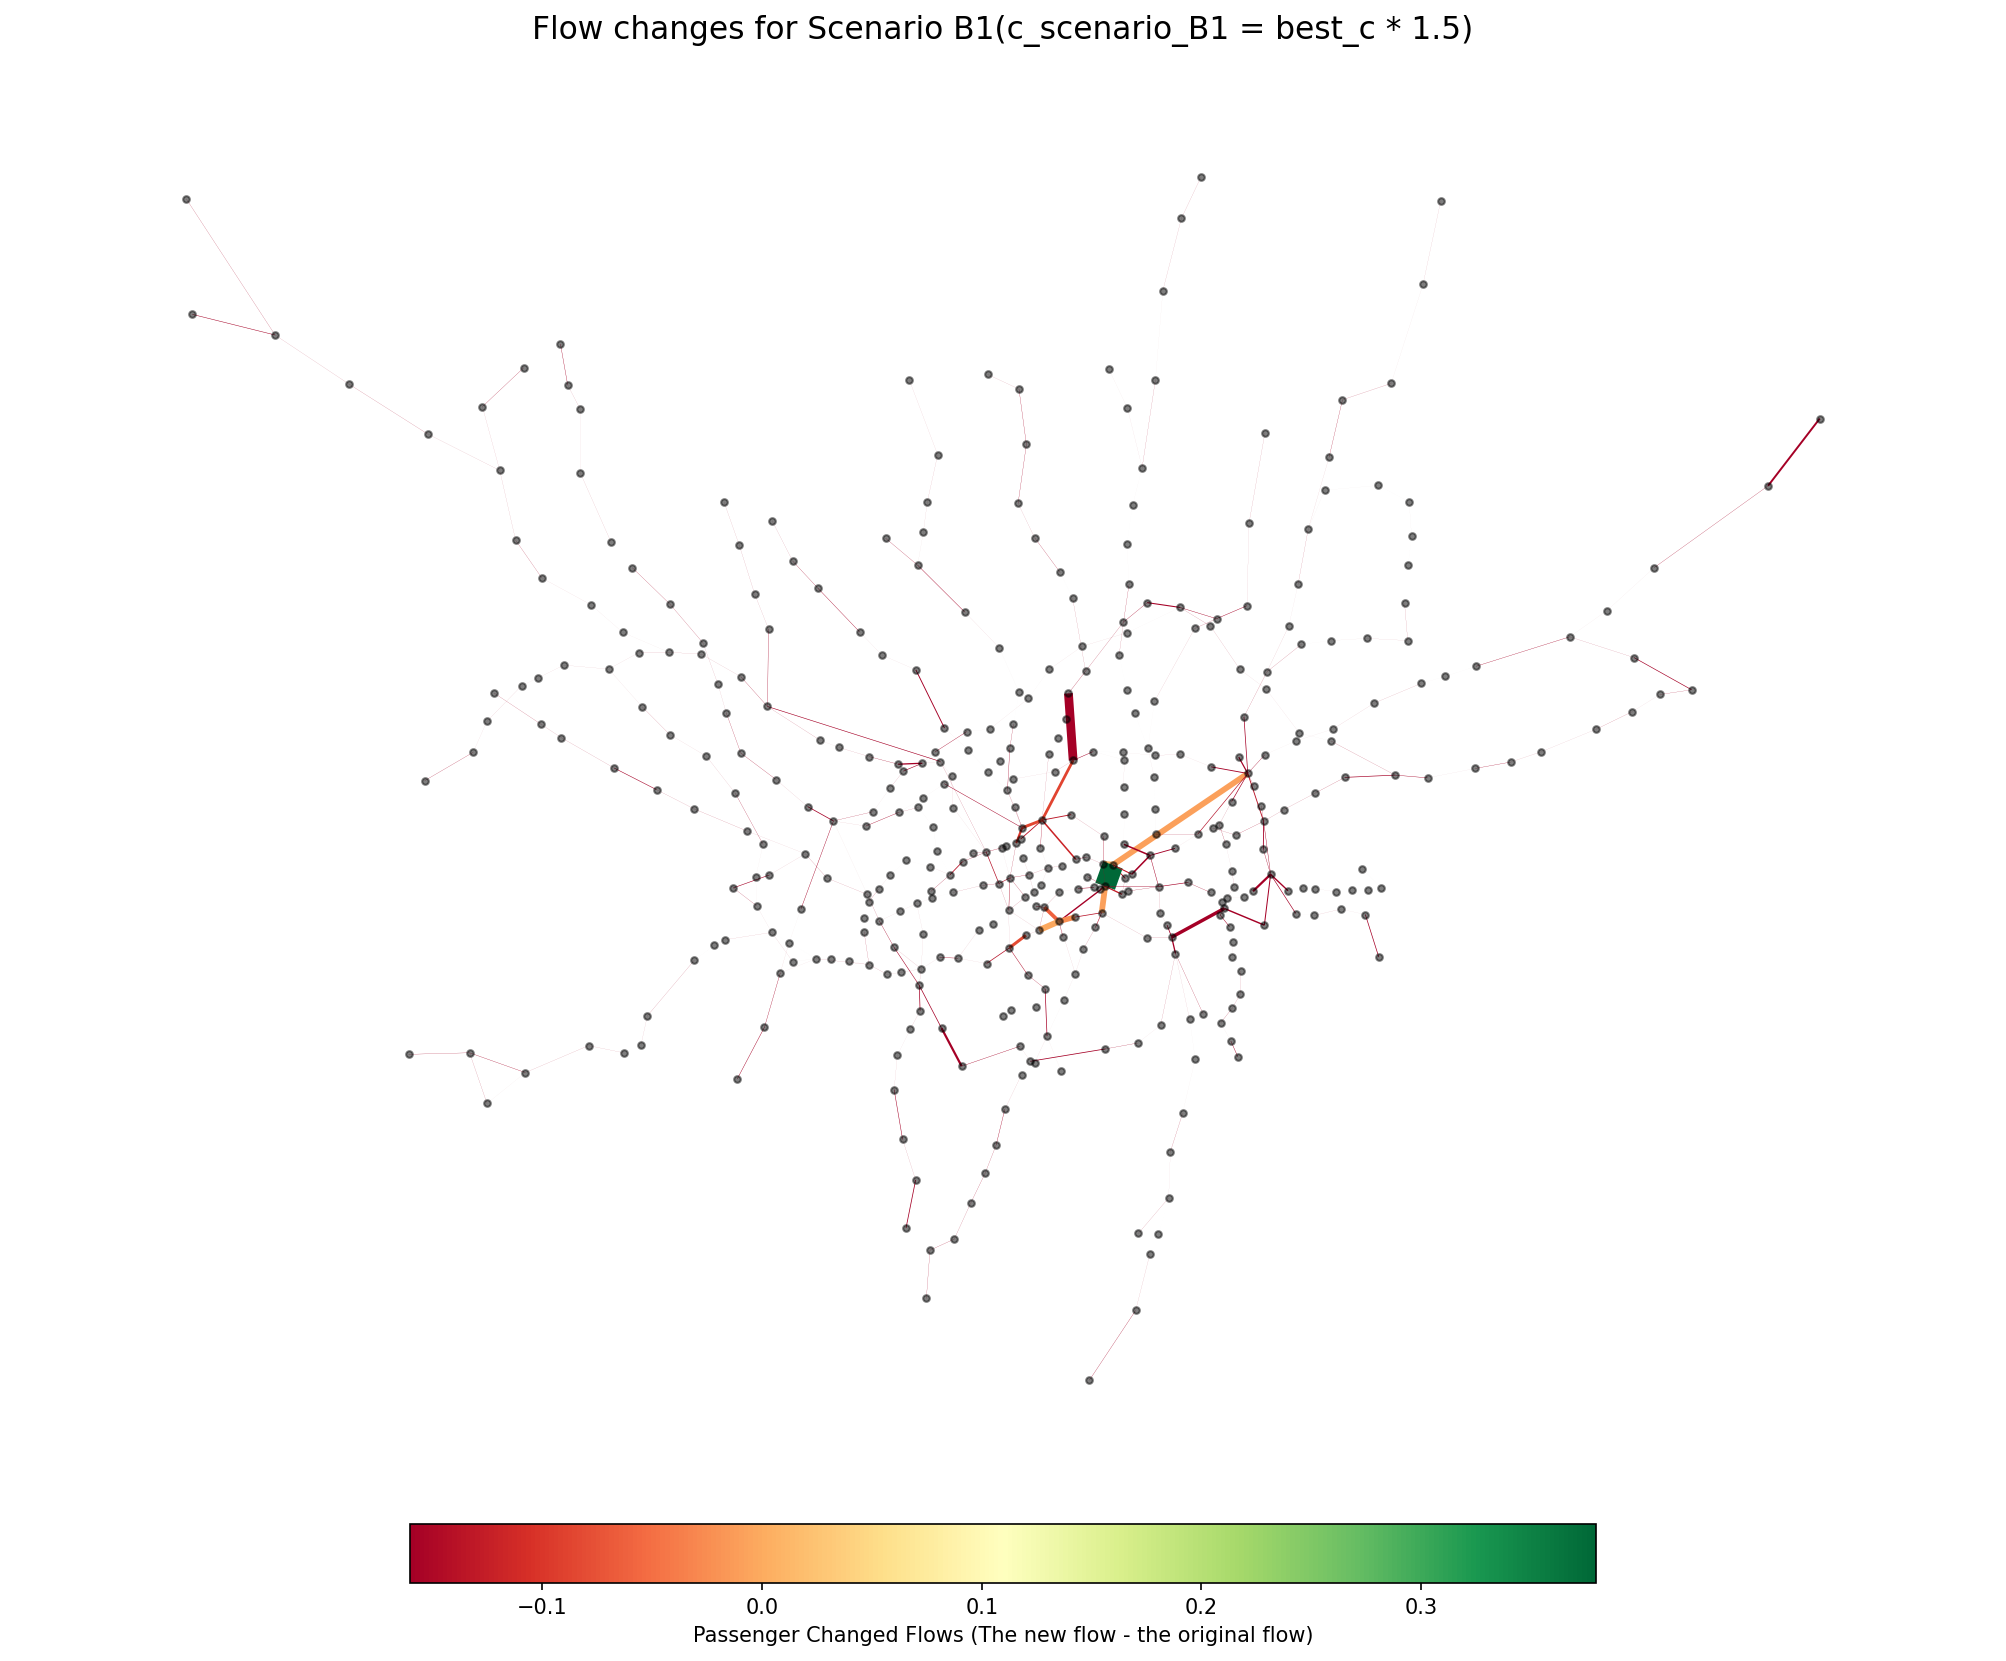

In [116]:
G_scenario_B = G.copy()
# Add new_flows and flows_diff attributes to edges of the graph for Scenario A
for u, v, data in G_scenario_B.edges(data=True):
    new_flow_value_df = df.loc[(df['station_origin'] == u) &
                                        (df['station_destination'] == v), 'new_flows_scenario_B1']
    if not new_flow_value_df.empty:
        new_flow_value = new_flow_value_df.iloc[0]
        flow_value = df.loc[(df['station_origin'] == u) &
                                     (df['station_destination'] == v), 'scaled_flows'].iloc[0]
        data['new_flows'] = new_flow_value
        data['flows_diff'] = new_flow_value - flow_value
    else:
        data['new_flows'] = 0
        data['flows_diff'] = 0

# 将每个站点的x和y坐标添加到节点属性中
for node in G_scenario_B.nodes():
    coords = G_scenario_B.nodes[node]['coords'].split(',')
    G_scenario_B.nodes[node]['x'] = float(coords[0].strip("()"))
    G_scenario_B.nodes[node]['y'] = float(coords[1].strip("()"))

# 绘制热力图
pos = {station: (G_scenario_B.nodes[station]['x'], G_scenario_B.nodes[station]['y']) for station in G_scenario_B.nodes()}
fig, ax = plt.subplots(figsize=(17, 15), dpi=150)
cmap = plt.cm.get_cmap("RdYlGn")
flows_values = [data['flows_diff'] for _, _, data in G_scenario_B.edges(data=True) if 'flows_diff' in data]
flow_color = [cmap(i['flows_diff'] / max(flows_values)) for _, _, i in G_scenario_B.edges(data=True) if 'flows_diff' in i]
flow_width = [i['flows_diff'] / max(flows_values) * 10 for _, _, i in G_scenario_B.edges(data=True) if 'flows_diff' in i]
edg = nx.draw_networkx_edges(G_scenario_B, pos, edge_color=flow_color, width=flow_width)
nx.draw_networkx_nodes(G_scenario_B, pos, node_size=10, node_color='black', alpha=0.5)
norm = plt.Normalize(min(flows_values), max(flows_values))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Passenger Changed Flows (The new flow - the original flow)", orientation="horizontal", shrink=0.6, pad=0.01)
plt.title("Flow changes for Scenario B1(c_scenario_B1 = best_c * 1.5)", fontsize=15)
plt.axis('off')
plt.show()


/var/folders/1k/27mkp8bj3ps60c3nmr7rbqzh0000gn/T/ipykernel_42290/28357927.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Passenger Changed Flows (The new flow - the original flow)", orientation="horizontal", shrink=0.6, pad=0.01)


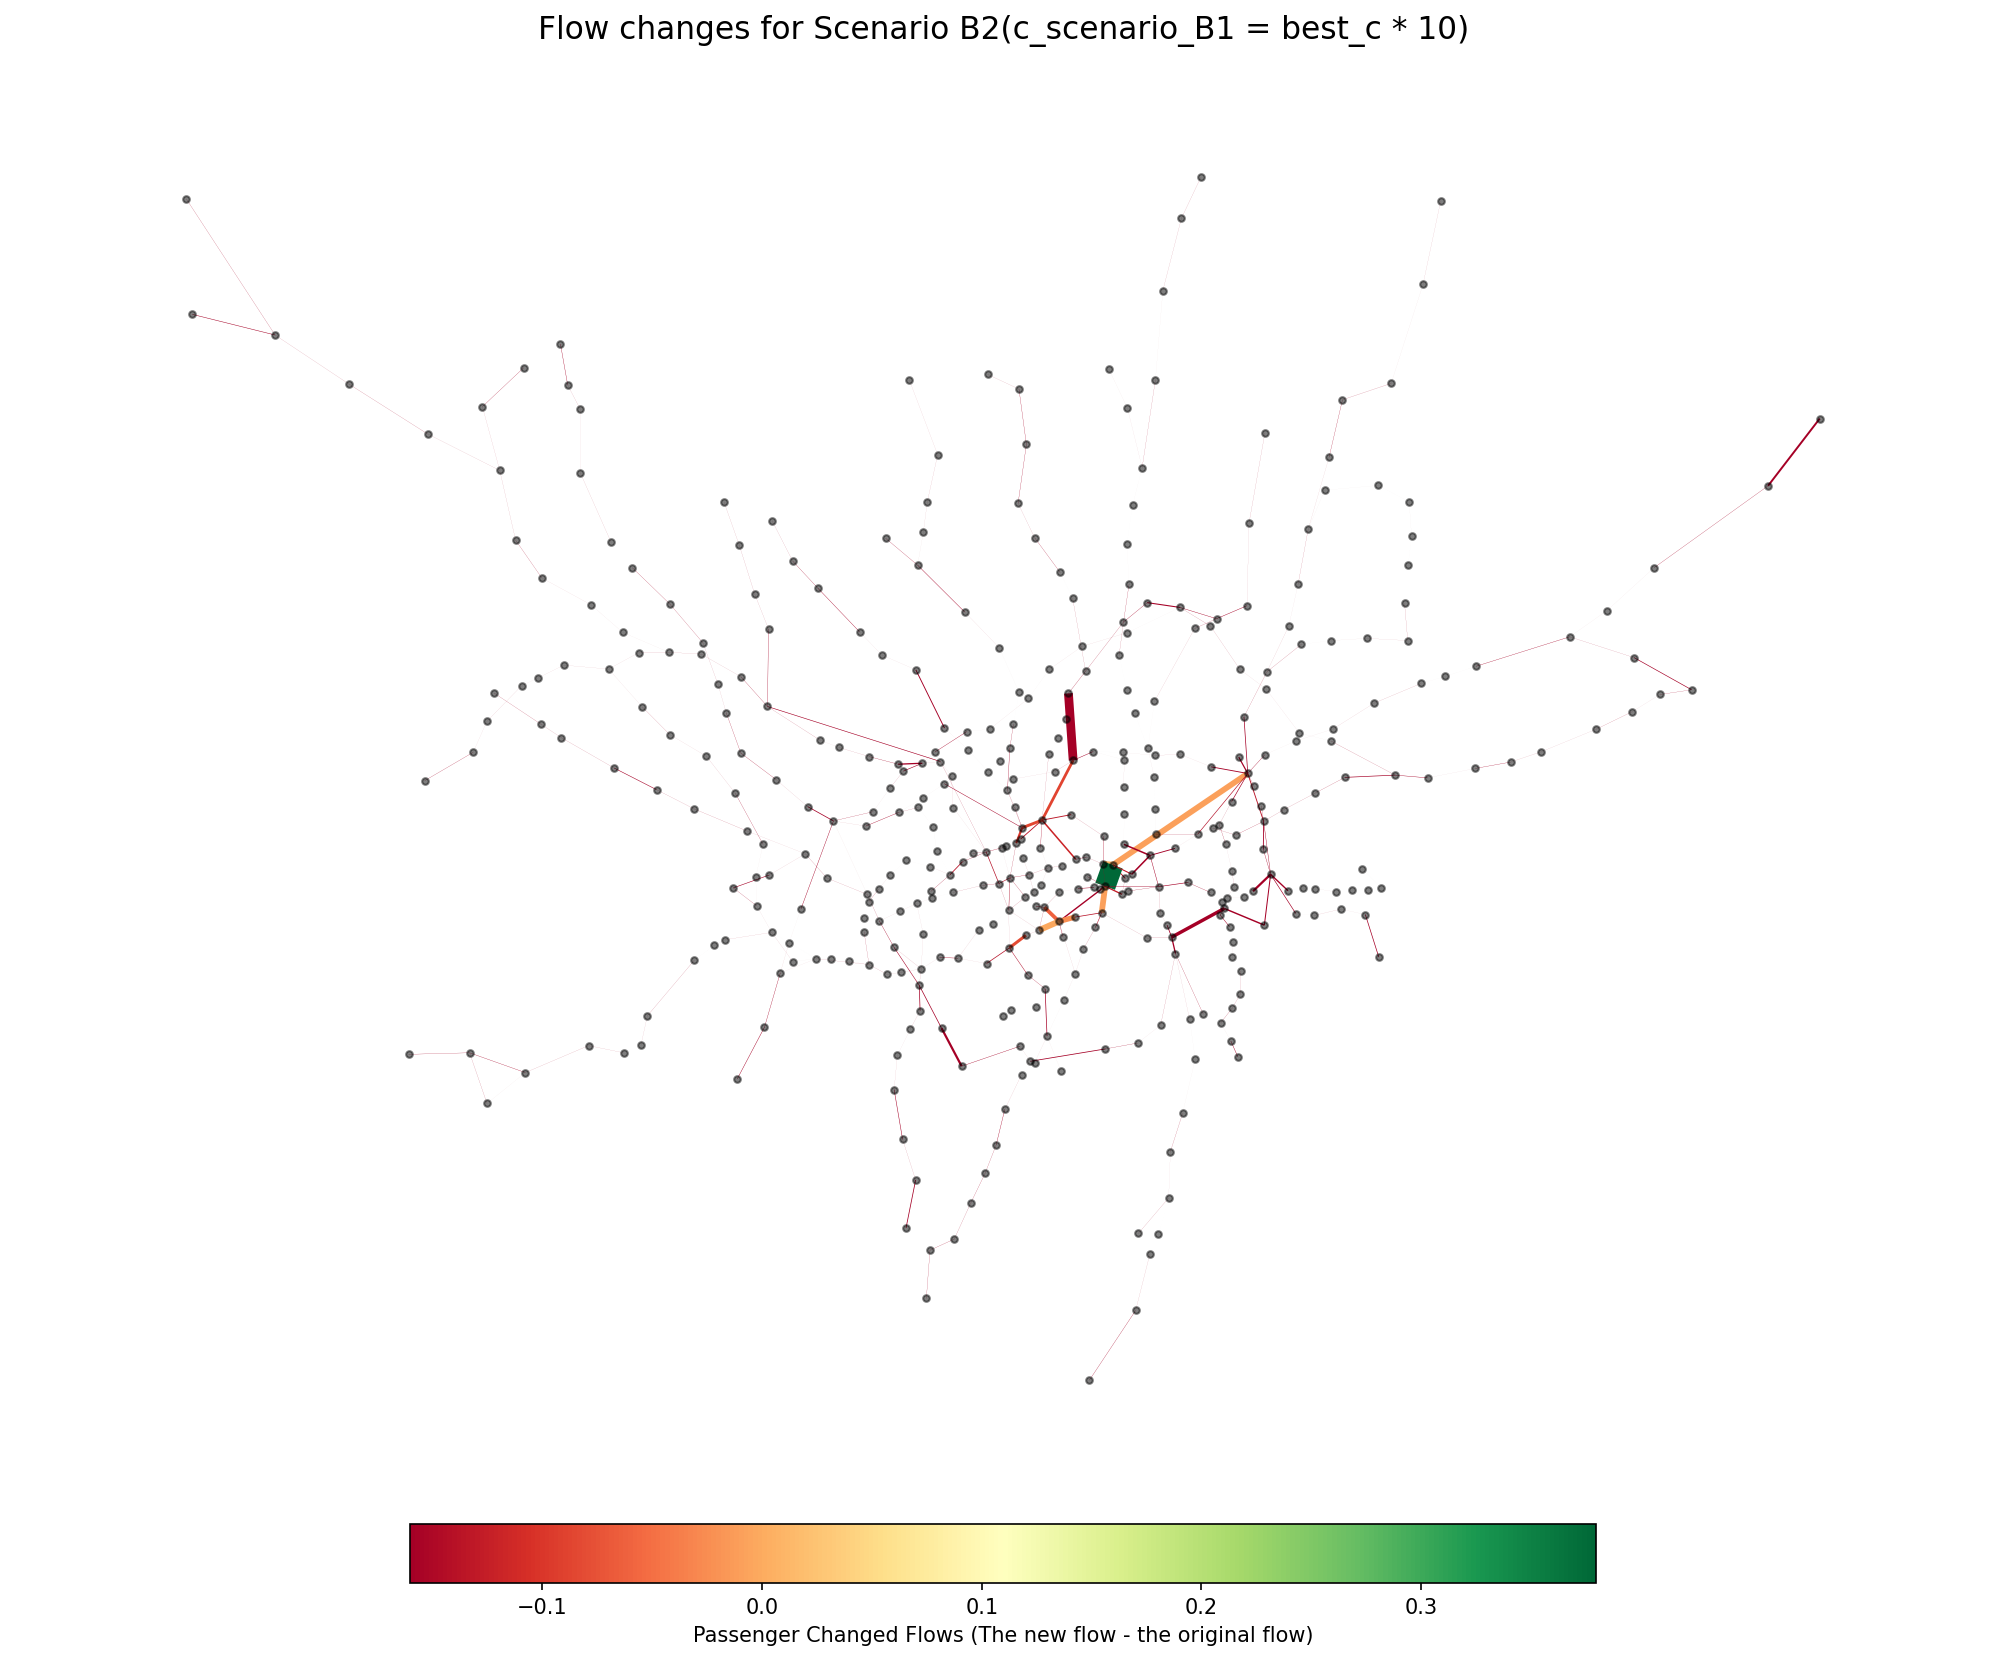

In [117]:
G_scenario_B = G.copy()
# Add new_flows and flows_diff attributes to edges of the graph for Scenario A
for u, v, data in G_scenario_B.edges(data=True):
    new_flow_value_df = df.loc[(df['station_origin'] == u) &
                                        (df['station_destination'] == v), 'new_flows_scenario_B2']
    if not new_flow_value_df.empty:
        new_flow_value = new_flow_value_df.iloc[0]
        flow_value = df.loc[(df['station_origin'] == u) &
                                     (df['station_destination'] == v), 'scaled_flows'].iloc[0]
        data['new_flows'] = new_flow_value
        data['flows_diff'] = new_flow_value - flow_value
    else:
        data['new_flows'] = 0
        data['flows_diff'] = 0

# 将每个站点的x和y坐标添加到节点属性中
for node in G_scenario_B.nodes():
    coords = G_scenario_B.nodes[node]['coords'].split(',')
    G_scenario_B.nodes[node]['x'] = float(coords[0].strip("()"))
    G_scenario_B.nodes[node]['y'] = float(coords[1].strip("()"))

# 绘制热力图
pos = {station: (G_scenario_B.nodes[station]['x'], G_scenario_B.nodes[station]['y']) for station in G_scenario_B.nodes()}
fig, ax = plt.subplots(figsize=(17, 15), dpi=150)
cmap = plt.cm.get_cmap("RdYlGn")
flows_values = [data['flows_diff'] for _, _, data in G_scenario_B.edges(data=True) if 'flows_diff' in data]
flow_color = [cmap(i['flows_diff'] / max(flows_values)) for _, _, i in G_scenario_B.edges(data=True) if 'flows_diff' in i]
flow_width = [i['flows_diff'] / max(flows_values) * 10 for _, _, i in G_scenario_B.edges(data=True) if 'flows_diff' in i]
edg = nx.draw_networkx_edges(G_scenario_B, pos, edge_color=flow_color, width=flow_width)
nx.draw_networkx_nodes(G_scenario_B, pos, node_size=10, node_color='black', alpha=0.5)
norm = plt.Normalize(min(flows_values), max(flows_values))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Passenger Changed Flows (The new flow - the original flow)", orientation="horizontal", shrink=0.6, pad=0.01)
plt.title("Flow changes for Scenario B2(c_scenario_B1 = best_c * 10)", fontsize=15)
plt.axis('off')
plt.show()
